                 Price
Date                  
2000-08-30  273.899994
2000-08-31  278.299988
2000-09-01  277.000000
2000-09-05  275.799988
2000-09-06  274.200012


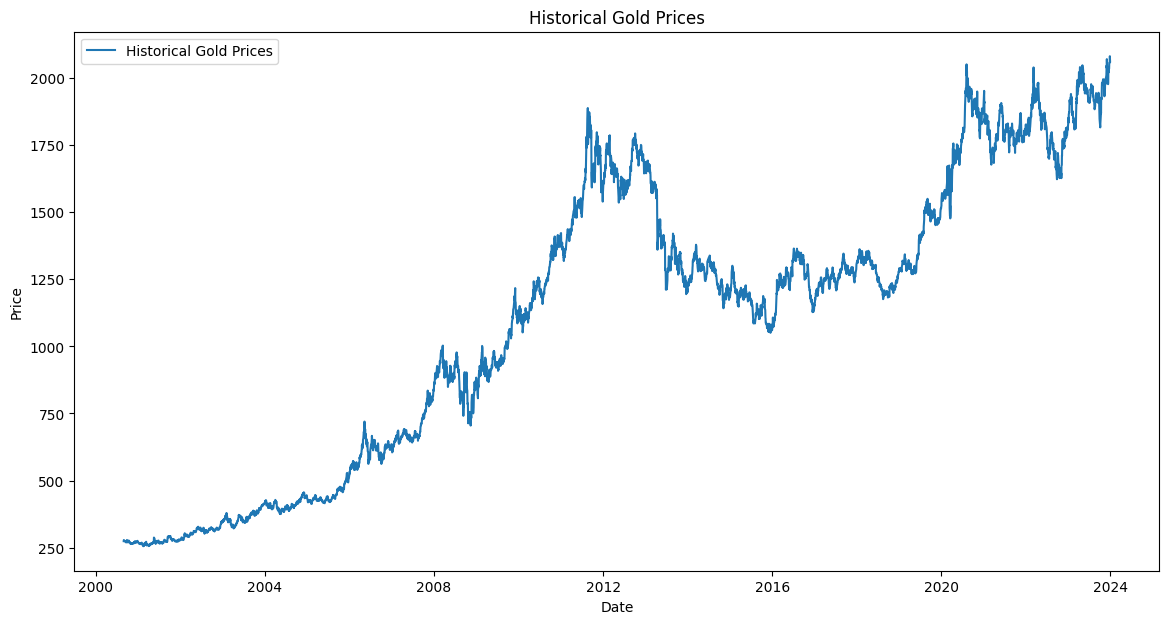

C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.0163
Epoch 2/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 3.1163e-04
Epoch 3/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 3.5341e-04
Epoch 4/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 2.6968e-04
Epoch 5/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 2.7235e-04
Epoch 6/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 2.5130e-04
Epoch 7/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 2.1448e-04
Epoch 8/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 2.3391e-04
Epoch 9/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 1.8144e-04
Epoch 10/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 2.3406e-04
Epoch 11/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 1.8496e-04
Epoch 12/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 1.5565e-04
Epoch 13/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 1.4714e-04
Epoch 14/20
182/182 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/s

In [ ]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', progress=False)

# Keep only the 'Adj Close' column as it reflects the adjusted closing price
gold_data = gold_data[['Adj Close']].rename(columns={'Adj Close': 'Price'})

# Sort by date
gold_data = gold_data.sort_index()

# Display the first few rows
print(gold_data.head())

# Plot the gold prices
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Price'], label='Historical Gold Prices')
plt.title('Historical Gold Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(gold_data[['Price']])

# Prepare the data for LSTM
look_back = 60  # Number of previous days to consider for prediction
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape the data to fit LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict future prices till 2050
future_dates = pd.date_range(start=gold_data.index[-1], end='2050-12-31', freq='D')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, 1))
    predicted_prices.append(prediction[0, 0])
    
    # Update the data with the new prediction
    last_data = np.append(last_data[1:], prediction, axis=0)

# Transform the predictions back to original scale
predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1, 1))

# Create a DataFrame to store the predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices.flatten()})
future_df.set_index('Date', inplace=True)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Price'], label='Historical Prices')
plt.plot(future_df['Predicted Price'], label='Predicted Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')

print("File downloaded")


In [1]:
!pip install yfinance numpy pandas matplotlib scikit-learn tensorflow

In [ ]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', progress=False)

# Fetch FED rates data
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Fill missing FED rates with the last available value
data['FED Rate'].fillna(method='ffill', inplace=True)

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
look_back = 60  # Number of previous days to consider for prediction
X, y = [], []

for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, data.columns.get_loc('Adj Close')])  # Predict the Adj Close price

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict future prices till 2050
future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='D')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]))
    predicted_prices.append(prediction[0, 0])
    
    # Update the data with the new prediction
    # Create a new row with the predicted Adj Close and same values for other features
    new_row = np.append(last_data[-1, :-1], prediction[0, 0])
    
    # Add the new row to the last_data array
    last_data = np.vstack((last_data[1:], new_row))

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), X.shape[2]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the last column with predictions (Adj Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices.flatten()})
future_df.set_index('Date', inplace=True)

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Historical Prices')
plt.plot(future_df['Predicted Price'], label='Predicted Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('8to1_gold_price_predictions_till_2050.csv')
print("Download completed")


C:\Users\surve\AppData\Local\Temp\ipykernel_12068\2239290071.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\AppData\Local\Temp\ipykernel_12068\2239290071.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `in

Epoch 1/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 0.0258
Epoch 2/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 2.2682e-04
Epoch 3/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 2.0639e-04
Epoch 4/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.8300e-04
Epoch 5/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.7894e-04
Epoch 6/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.4557e-04
Epoch 7/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.2745e-04
Epoch 8/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.3598e-04
Epoch 9/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 1.5235e-04
Epoch 10/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.5264e-04
Epoch 11/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.1307e-04
Epoch 12/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 1.2585e-04
Epoch 13/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 1.1208e-04
Epoch 14/20
181/181 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 9

Epoch 1/20


C:\Users\surve\AppData\Local\Temp\ipykernel_12068\3894584593.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\AppData\Local\Temp\ipykernel_12068\3894584593.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `in

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - loss: 0.2830 - val_loss: 0.2628
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0667 - val_loss: 0.0464
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0221 - val_loss: 0.0391
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0222 - val_loss: 0.0459
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0112 - val_loss: 0.0546
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0122 - val_loss: 0.0440
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0086 - val_loss: 0.0243
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0075 - val_loss: 0.0301
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0077 - val_loss: 0.0207
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0061 - val_loss: 0.0253
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0054 - val_loss: 0.0248
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0053 - val_loss: 0.0263
Epoch 13/20

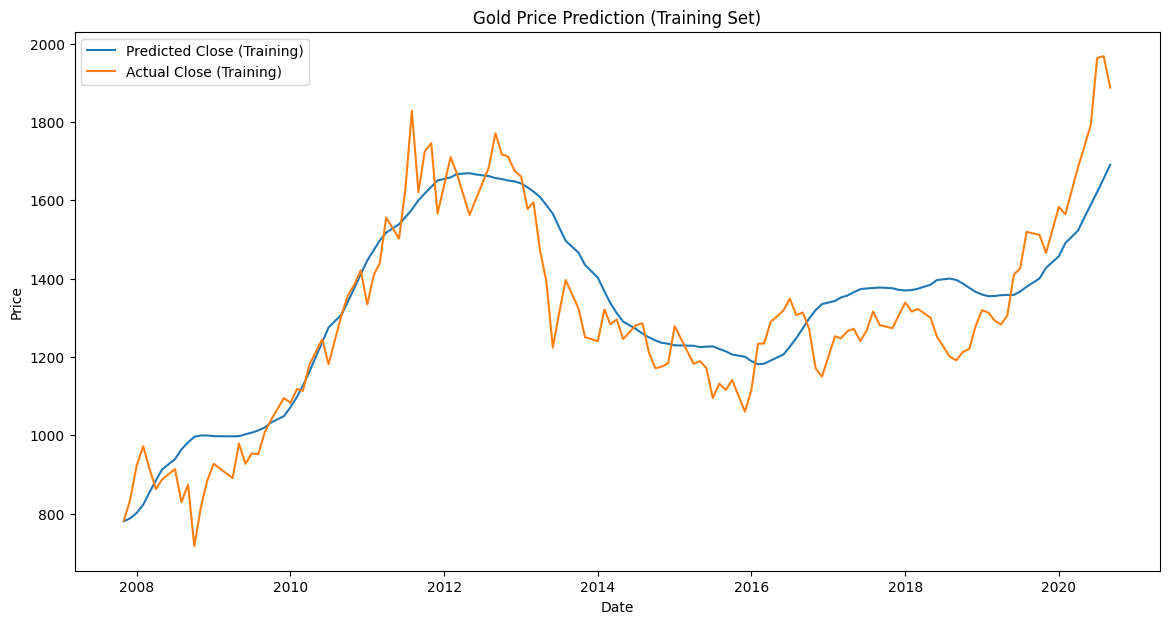

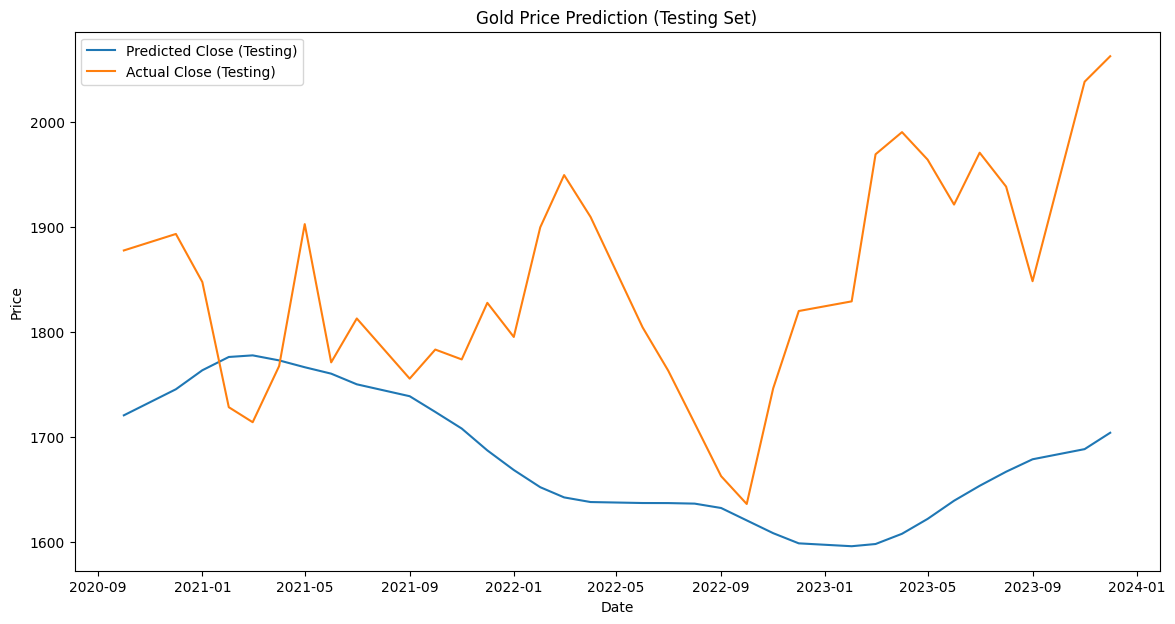

Download completed


In [4]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Fetch FED rates data with monthly frequency
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Fill missing FED rates with the last available value
data['FED Rate'].fillna(method='ffill', inplace=True)

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
look_back = 60  # Number of previous periods (months) to consider for prediction
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, [0, 1, 2, 3]])  # Predict Open, High, Low, and Close prices

X, y = np.array(X), np.array(y)

# Split the data into training and testing sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Make predictions
predicted_train = model.predict(X_train)
predicted_test = model.predict(X_test)

# Inverse transform the predictions and actual values
predicted_train = scaler.inverse_transform(np.hstack((predicted_train, np.zeros((predicted_train.shape[0], scaled_data.shape[1] - 4)))))
predicted_test = scaler.inverse_transform(np.hstack((predicted_test, np.zeros((predicted_test.shape[0], scaled_data.shape[1] - 4)))))
y_train = scaler.inverse_transform(np.hstack((y_train, np.zeros((y_train.shape[0], scaled_data.shape[1] - 4)))))
y_test = scaler.inverse_transform(np.hstack((y_test, np.zeros((y_test.shape[0], scaled_data.shape[1] - 4)))))

# Convert predictions to DataFrame for easier plotting
train_dates = data.index[look_back:split_index + look_back]
test_dates = data.index[split_index + look_back:]

predicted_train_df = pd.DataFrame(predicted_train[:, :4], index=train_dates, columns=['Open', 'High', 'Low', 'Close'])
predicted_test_df = pd.DataFrame(predicted_test[:, :4], index=test_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the training set predictions
plt.figure(figsize=(14, 7))
plt.plot(predicted_train_df['Close'], label='Predicted Close (Training)')
plt.plot(pd.DataFrame(y_train[:, 3], index=train_dates), label='Actual Close (Training)')
plt.title('Gold Price Prediction (Training Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the testing set predictions
plt.figure(figsize=(14, 7))
plt.plot(predicted_test_df['Close'], label='Predicted Close (Testing)')
plt.plot(pd.DataFrame(y_test[:, 3], index=test_dates), label='Actual Close (Testing)')
plt.title('Gold Price Prediction (Testing Set)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
predicted_test_df.to_csv('8to8gold_price_predictions_till_2050.csv')
print("Download completed")


In [8]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Fetch FED rates data with monthly frequency
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Debug: Print the shapes and head of the original DataFrames
print("Gold DataFrame shape:", gold_data.shape)
print(gold_data.head())
print("FED DataFrame shape:", fed_data.shape)
print(fed_data.head())

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Fill missing FED rates with the last available value
data['FED Rate'].fillna(method='ffill', inplace=True)

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
data.dropna(inplace=True)

# Debug: Print the shape and head of the merged DataFrame
print("\nMerged DataFrame shape:", data.shape)
print(data.head())

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Debug: Print the shape of the scaled data
print("\nScaled data shape:", scaled_data.shape)

# Prepare the data for LSTM
look_back = 60  # Number of previous periods (months) to consider for prediction
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, [0, 1, 2, 3]])  # Predict Open, High, Low, and Close prices

X, y = np.array(X), np.array(y)

# Debug: Print the shapes of X and y
print("\nX shape:", X.shape)
print("y shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Make predictions for future dates till 2050
future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='M')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]))
    predicted_prices.append(prediction[0])
    
    # Debug: Print the shape of last_data and prediction
    print("\nLast data shape before update:", last_data.shape)
    print("Prediction shape:", prediction.shape)

    # Update the data with the new prediction
    next_input = np.vstack((last_data[1:], prediction))  # Stack arrays vertically
    last_data = next_input
    
    # Debug: Print the shape of last_data after update
    print("Last data shape after update:", last_data.shape)

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first 4 columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')
print("Download completed")


Gold DataFrame shape: (239, 5)
                  Open        High         Low       Close   Adj Close
Date                                                                  
2000-09-01  277.000000  278.399994  269.000000  273.600006  273.600006
2000-11-01  263.899994  270.200012  263.899994  270.100006  270.100006
2000-12-01  269.700012  276.000000  268.000000  272.000000  272.000000
2001-01-01  268.399994  268.399994  262.799988  265.600006  265.600006
2001-02-01  266.299988  268.899994  255.000000  266.799988  266.799988
FED DataFrame shape: (468, 1)
            FED Rate
Date                
1985-01-01      8.05
1985-02-01      8.50
1985-03-01      8.18
1985-04-01      7.85
1985-05-01      7.14

Merged DataFrame shape: (226, 9)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-01-01  278.899994  287.399994  278.100006  282.100006  282.100006   
2002-02-01  282.299988  308.000000  282

C:\Users\surve\AppData\Local\Temp\ipykernel_12068\2017349847.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\AppData\Local\Temp\ipykernel_12068\2017349847.py:34: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `in

6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.4634
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1253
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0350
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0237
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0179
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0124
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0095
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0097
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0072
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0071
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0054
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0042
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0045
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0041
Epoch 16/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/

C:\Users\surve\AppData\Local\Temp\ipykernel_12068\2017349847.py:95: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='M')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 9 and the array at index 1 has size 4

In [9]:
# Make predictions for future dates till 2050
future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='M')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]))
    predicted_prices.append(prediction[0])
    
    # Debug: Print the shape of last_data and prediction
    print("\nLast data shape before update:", last_data.shape)
    print("Prediction shape:", prediction.shape)

    # Update the data with the new prediction
    # Append the prediction to the appropriate columns of last_data
    next_input = np.copy(last_data[1:])  # Move the data forward
    next_input = np.hstack((next_input[:, :-4], prediction))  # Replace last 4 columns with the prediction
    last_data = next_input
    
    # Debug: Print the shape of last_data after update
    print("Last data shape after update:", last_data.shape)

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first 4 columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')
print("Download completed")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)


C:\Users\surve\AppData\Local\Temp\ipykernel_12068\1490887795.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='M')


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 59 and the array at index 1 has size 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

Last data shape before update: (60, 9)
Prediction shape: (1, 4)
Last data shape after update: (60, 9)
1/1 ━━━━━━━━━

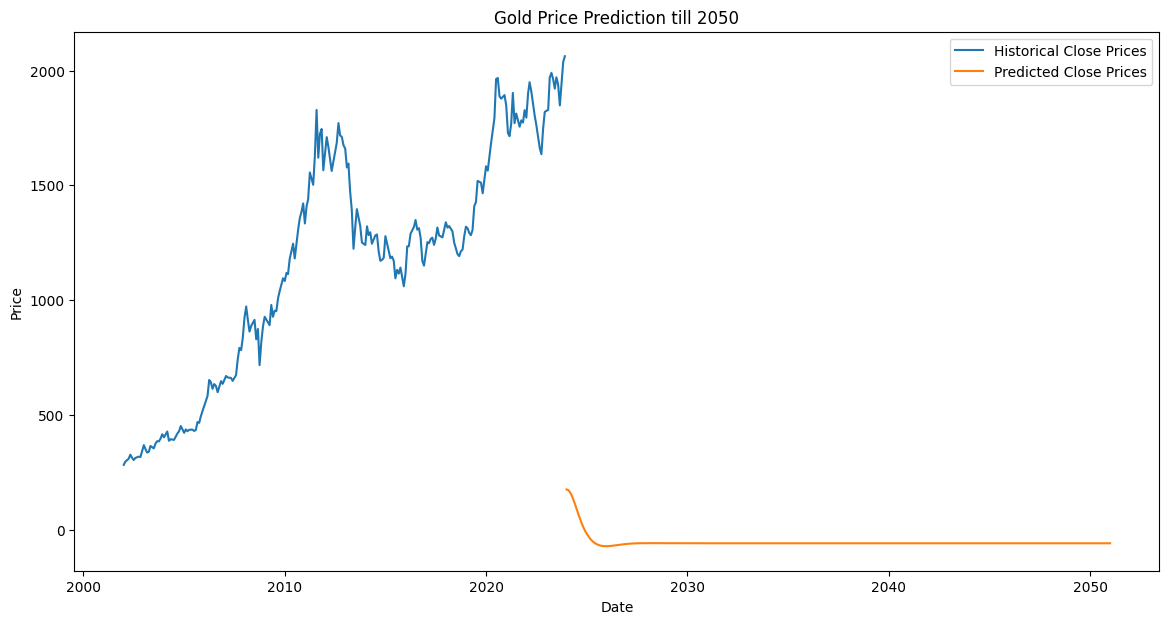

Download completed


In [10]:
# Make predictions for future dates till 2050
future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='ME')  # Use 'ME' for month-end frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]))
    predicted_prices.append(prediction[0])

    # Debug: Print the shape of last_data and prediction
    print("\nLast data shape before update:", last_data.shape)
    print("Prediction shape:", prediction.shape)

    # Update the data with the new prediction
    # Replace the last four columns in the last row of last_data with the new prediction
    next_input = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Move data forward, add a new row of zeros
    next_input[-1, -4:] = prediction  # Replace the last four columns with the prediction
    last_data = next_input

    # Debug: Print the shape of last_data after update
    print("Last data shape after update:", last_data.shape)

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -4:] = predicted_prices  # Fill only the last four columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -4:]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')
print("Download completed")


C:\Users\surve\AppData\Local\Temp\ipykernel_13776\21104146.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\AppData\Local\Temp\ipykernel_13776\21104146.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\surve\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 413ms/step - loss: 0.4276
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 433ms/step - loss: 0.2209
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 660ms/step - loss: 0.0402
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 884ms/step - loss: 0.0461
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 786ms/step - loss: 0.0313
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 975ms/step - loss: 0.0239
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 728ms/step - loss: 0.0259
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 587ms/step - loss: 0.0271
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 439ms/step - loss: 0.0233
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - loss: 0.0185
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 611ms/step - loss: 0.0153
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 808ms/step - loss: 0.0212
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - loss: 0.0151
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - loss: 0.0130
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 492ms/step - loss: 0.0122
Epo

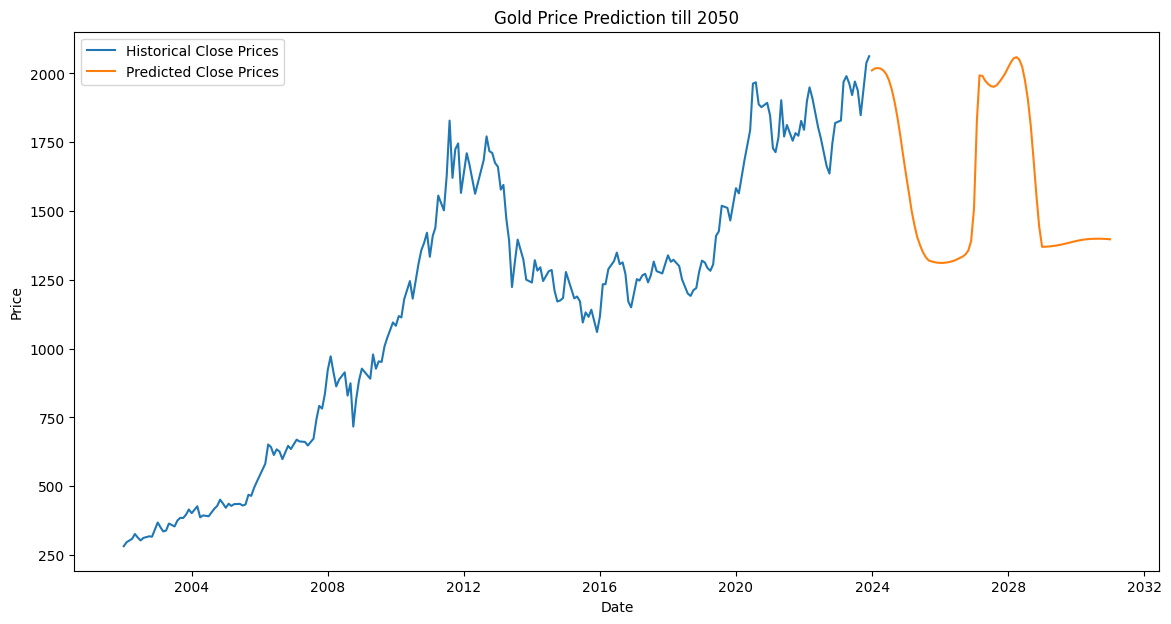

Download completed


In [2]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Fetch FED rates data with monthly frequency
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Fill missing FED rates with the last available value
data['FED Rate'].fillna(method='ffill', inplace=True)

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
look_back = 60  # Number of previous periods (months) to consider for prediction
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, [0, 1, 2, 3]])  # Predict Open, High, Low, and Close prices

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2050
future_dates = pd.date_range(start=data.index[-1], end='2050-12-31', freq='ME')  # Use 'ME' for month-end frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0])

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, :4] = prediction  # Update with predicted Open, High, Low, Close

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first four columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')
print("Download completed")

In [3]:
!pip install mplfinance 


   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/75.0 kB ? eta -:--:--
   ---------------- ----------------------- 30.7/75.0 kB 72.6 kB/s eta 0:00:01
   ---------------- ----------------------- 30.7/75.0 kB 72.6 kB/s eta 0:00:01
   ---------------- ----------------------- 30.7/75.0 kB 72.6 kB/s eta 0:00:01
   ---------------- ----------------------- 30.7/75.0 kB 72.6 kB/s eta 0:00:01
   ---------------- ----------------------- 30.7

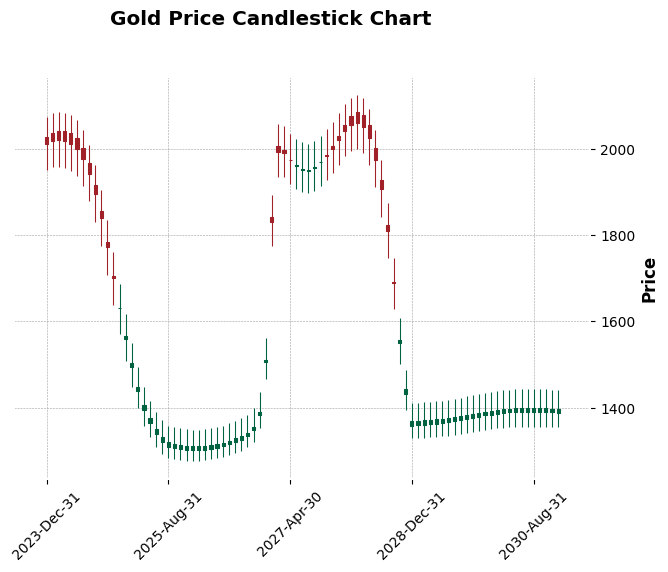

In [5]:
import pandas as pd

# Read the CSV file
file_path = r'C:\Users\surve\OneDrive\Desktop\Github Repository\Repository4 - Gold Predictions\gold_price_predictions_till_2050_new.csv'
df = pd.read_csv(file_path)

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%y')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

import mplfinance as mpf

# Prepare the data for mplfinance
df.index.name = 'Date'

# Plotting
mpf.plot(df, type='candle', style='charles', title='Gold Price Candlestick Chart', ylabel='Price')



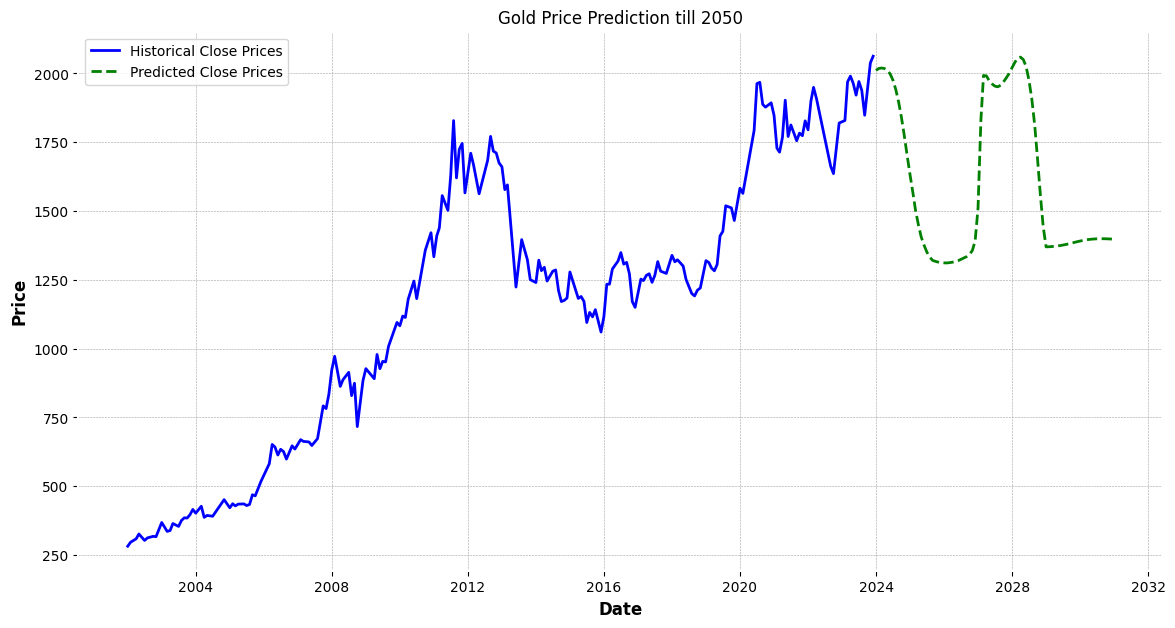

In [8]:


# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices', color='blue')
plt.plot(future_df['Close'], label='Predicted Close Prices', linestyle='--', color='green')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\Snapper\AppData\Local\Temp\ipykernel_15136\1100177033.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\Snapper\AppData\Local\Temp\ipykernel_15136\1100177033.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'].fillna(method='ffill', inplace=True)
C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass 

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - loss: 0.4236
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - loss: 0.1676
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 460ms/step - loss: 0.0497
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 476ms/step - loss: 0.0752
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - loss: 0.0524
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 481ms/step - loss: 0.0358
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 0.0257
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 467ms/step - loss: 0.0272
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step - loss: 0.0288
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 454ms/step - loss: 0.0263
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - loss: 0.0238
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - loss: 0.0232
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - loss: 0.0233
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 486ms/step - loss: 0.0243
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 481ms/step - loss: 0.0222
Epo

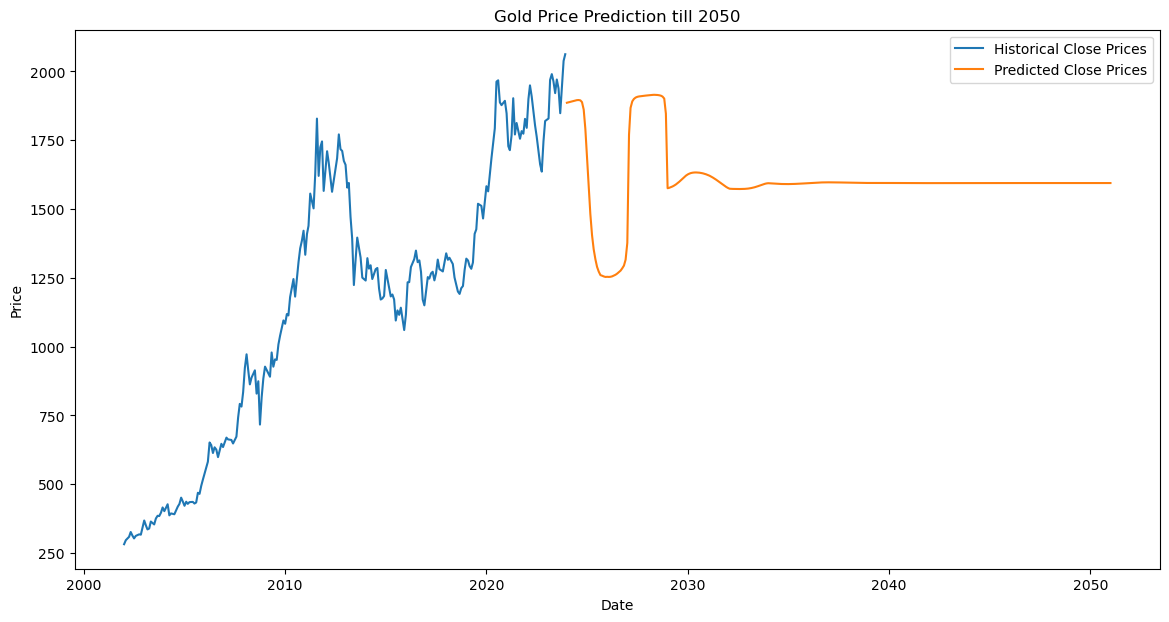

Download completed


In [7]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Fetch FED rates data with monthly frequency
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Fill missing FED rates with the last available value
data['FED Rate'].fillna(method='ffill', inplace=True)

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
look_back = 60  # Number of previous periods (months) to consider for prediction
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, [0, 1, 2, 3]])  # Predict Open, High, Low, and Close prices

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2050
future_dates = pd.date_range(start=data.index[-1], end='2030-12-31', freq='ME')  # Use 'ME' for month-end frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0])

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, :4] = prediction  # Update with predicted Open, High, Low, Close

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first four columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2050')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2050.csv')
print("Download completed")

Initial Data Shape: (239, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2000-09-01  277.000000  278.399994  269.000000  273.600006  273.600006   
2000-11-01  263.899994  270.200012  263.899994  270.100006  270.100006   
2000-12-01  269.700012  276.000000  268.000000  272.000000  272.000000   
2001-01-01  268.399994  268.399994  262.799988  265.600006  265.600006   
2001-02-01  266.299988  268.899994  255.000000  266.799988  266.799988   

            FED Rate  
Date                  
2000-09-01      6.03  
2000-11-01      6.01  
2000-12-01      5.73  
2001-01-01      4.84  
2001-02-01      4.72  
Data Shape Before Dropna: (239, 9)
Data Shape After Dropna: (226, 9)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-01-01  278.899994  287.399994  278.100006  282.100006  282.100006   


C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\158796900.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['FED Rate'] = data['FED Rate'].fillna(method='ffill')
C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 359ms/step - loss: 0.2080
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 378ms/step - loss: 0.0897
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - loss: 0.0217
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step - loss: 0.0285
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 370ms/step - loss: 0.0190
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step - loss: 0.0129
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step - loss: 0.0154
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - loss: 0.0140
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 396ms/step - loss: 0.0116
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 364ms/step - loss: 0.0113
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - loss: 0.0124
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - loss: 0.0119
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 384ms/step - loss: 0.0110
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 387ms/step - loss: 0.0099
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step - loss: 0.0102
Epo

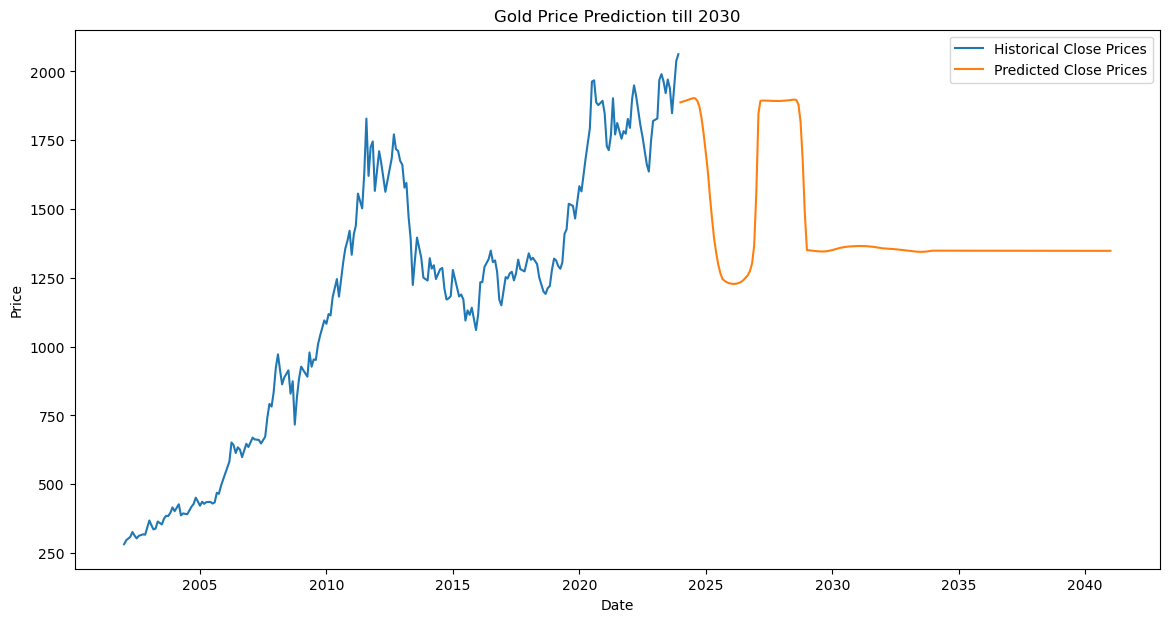

Download completed


In [38]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import Huber

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with daily frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval= '1mo', progress=False)

# Fetch FED rates data with daily frequency
fed_data = yf.download('^IRX', start='1974-01-01', end='2024-01-01', interval= '1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]
fed_data = fed_data[['Adj Close']].rename(columns={'Adj Close': 'FED Rate'})

# Merge gold data with FED rates
data = gold_data.merge(fed_data, left_index=True, right_index=True, how='left')

# Check initial data
print("Initial Data Shape:", data.shape)
print(data.head())

# Fill missing FED rates with the last available value
data['FED Rate'] = data['FED Rate'].fillna(method='ffill')

# Calculate Rate of Change (ROC)
data['ROC'] = data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
data['RSI'] = 100 - (100 / (1 + (gain / loss)))

# Calculate MACD
ema_12 = data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Adj Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
print("Data Shape Before Dropna:", data.shape)
data = data.dropna()
print("Data Shape After Dropna:", data.shape)
print(data.head())

# Define look_back period
look_back = 60  # Number of previous periods (days) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if data.empty or len(data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, [0, 1, 2, 3]])  # Predict Open, High, Low, and Close prices

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss= Huber(delta=1.0))

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2030
future_dates = pd.date_range(start=data.index[-1], end='2040-12-31', freq='ME')  # Use 'D' for daily frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0])

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, :4] = prediction  # Update with predicted Open, High, Low, Close

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first four columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create a DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2030')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2030.csv')
print("Download completed")


Initial Data Shape: (239, 5)
                  Open        High         Low       Close   Adj Close
Date                                                                  
2000-09-01  277.000000  278.399994  269.000000  273.600006  273.600006
2000-11-01  263.899994  270.200012  263.899994  270.100006  270.100006
2000-12-01  269.700012  276.000000  268.000000  272.000000  272.000000
2001-01-01  268.399994  268.399994  262.799988  265.600006  265.600006
2001-02-01  266.299988  268.899994  255.000000  266.799988  266.799988
Data Shape After Dropna: (226, 8)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2002-01-01  278.899994  287.399994  278.100006  282.100006  282.100006   
2002-02-01  282.299988  308.000000  282.200012  296.700012  296.700012   
2002-03-01  298.000000  304.500000  289.899994  302.600006  302.600006   
2002-04-01  302.600006  312.500000  297.500000  308.899994  308.899994

C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 328ms/step - loss: 0.2091
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 345ms/step - loss: 0.0689
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - loss: 0.0197
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 349ms/step - loss: 0.0359
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step - loss: 0.0202
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - loss: 0.0176
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 346ms/step - loss: 0.0180
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - loss: 0.0125
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 354ms/step - loss: 0.0154
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - loss: 0.0148
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step - loss: 0.0113
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step - loss: 0.0109
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - loss: 0.0123
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 356ms/step - loss: 0.0121
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 366ms/step - loss: 0.0100
Epo

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3838681958.py:92: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=gold_data.index[-1], end='2040-12-31', freq='M')  # Use 'M' for monthly frequency


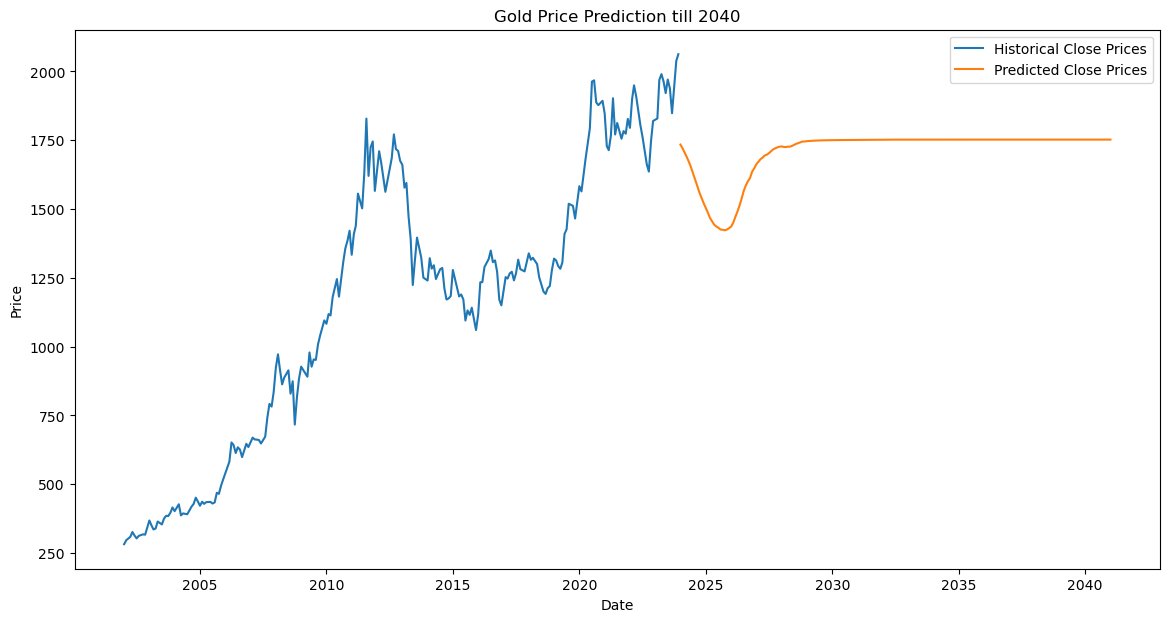

Download completed


In [48]:
# Import required libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import Huber

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Check initial data
print("Initial Data Shape:", gold_data.shape)
print(gold_data.head())

# Calculate Rate of Change (ROC)
gold_data['ROC'] = gold_data['Adj Close'].pct_change(periods=1)

# Calculate RSI
window_length = 14
delta = gold_data['Adj Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=window_length).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=window_length).mean()
gold_data['RSI'] = 100 - (100 / (1 + (gain / loss)))

# Calculate MACD
ema_12 = gold_data['Adj Close'].ewm(span=12, adjust=False).mean()
ema_26 = gold_data['Adj Close'].ewm(span=26, adjust=False).mean()
gold_data['MACD'] = ema_12 - ema_26

# Drop rows with NaN values created by the technical indicators
gold_data = gold_data.dropna()
print("Data Shape After Dropna:", gold_data.shape)
print(gold_data.head())

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if gold_data.empty or len(gold_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(gold_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict Open, High, Low, and Close prices
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, :4])  # Predict Open, High, Low, Close prices 

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=50))
model.add(Dense(units=4))  # 4 outputs for Open, High, Low, Close

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=Huber(delta=1.0))

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=gold_data.index[-1], end='2040-12-31', freq='M')  # Use 'M' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back periods of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0])

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, :4] = prediction  # Update with predicted Open, High, Low, Close

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, :4] = predicted_prices  # Fill only the first four columns with predictions (Open, High, Low, Close)
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, :4]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Open', 'High', 'Low', 'Close'])

# Plot the predictions for Close Prices
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Historical Close Prices')
plt.plot(future_df['Close'], label='Predicted Close Prices')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


Initial Data Shape: (239, 5)
                  Open        High         Low       Close   Adj Close
Date                                                                  
2000-09-01  277.000000  278.399994  269.000000  273.600006  273.600006
2000-11-01  263.899994  270.200012  263.899994  270.100006  270.100006
2000-12-01  269.700012  276.000000  268.000000  272.000000  272.000000
2001-01-01  268.399994  268.399994  262.799988  265.600006  265.600006
2001-02-01  266.299988  268.899994  255.000000  266.799988  266.799988
X Shape: (179, 60, 5)
y Shape: (179,)


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 17s 653ms/step - loss: 0.3722
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 650ms/step - loss: 0.1139
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 634ms/step - loss: 0.0475
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 646ms/step - loss: 0.1443
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 654ms/step - loss: 0.0962
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 714ms/step - loss: 0.0335
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 650ms/step - loss: 0.0636
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - loss: 0.0283
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 0.0358
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 672ms/step - loss: 0.0432
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 706ms/step - loss: 0.0339
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 705ms/step - loss: 0.0258
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 731ms/step - loss: 0.0311
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step - loss: 0.0278
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 738ms/step - loss: 0.0225
Epo

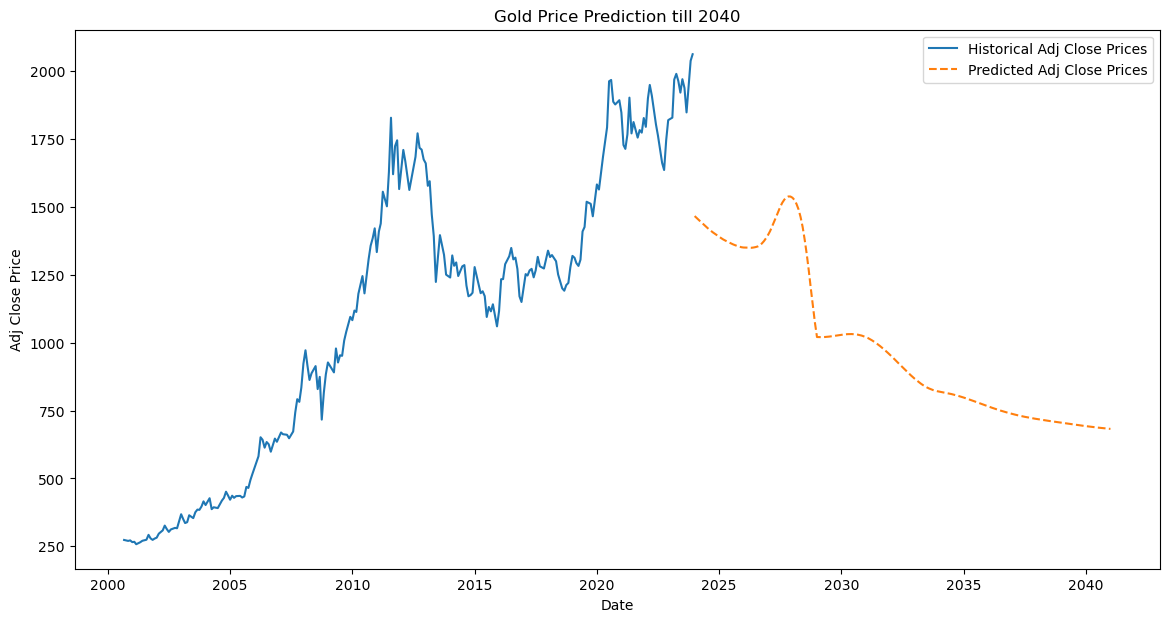

Download completed


In [71]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError  # Using MSE as the loss function

# For reproducibility
np.random.seed(42)

# Fetch gold price data for the last 50 years with monthly frequency
gold_data = yf.download('GC=F', start='1974-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_data = gold_data[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Check initial data
print("Initial Data Shape:", gold_data.shape)
print(gold_data.head())

# Drop rows with NaN values
gold_data = gold_data.dropna()

# Define look_back period
look_back = 60  # Number of previous periods (days) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if gold_data.empty or len(gold_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(gold_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Adj Close' price
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 4])  # Predict only 'Adj Close' price 

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Adj Close'

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=gold_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 4] = prediction[0, 0]  # Update with predicted 'Adj Close'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, 4] = predicted_prices  # Fill only the 'Adj Close' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, 4]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Adj Close'])

# Plot the predictions for 'Adj Close'
plt.figure(figsize=(14, 7))
plt.plot(gold_data.index, gold_data['Adj Close'], label='Historical Adj Close Prices')
plt.plot(future_df.index, future_df['Adj Close'], label='Predicted Adj Close Prices', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_adj_close_predictions_till_2040.csv')
print("Download completed")


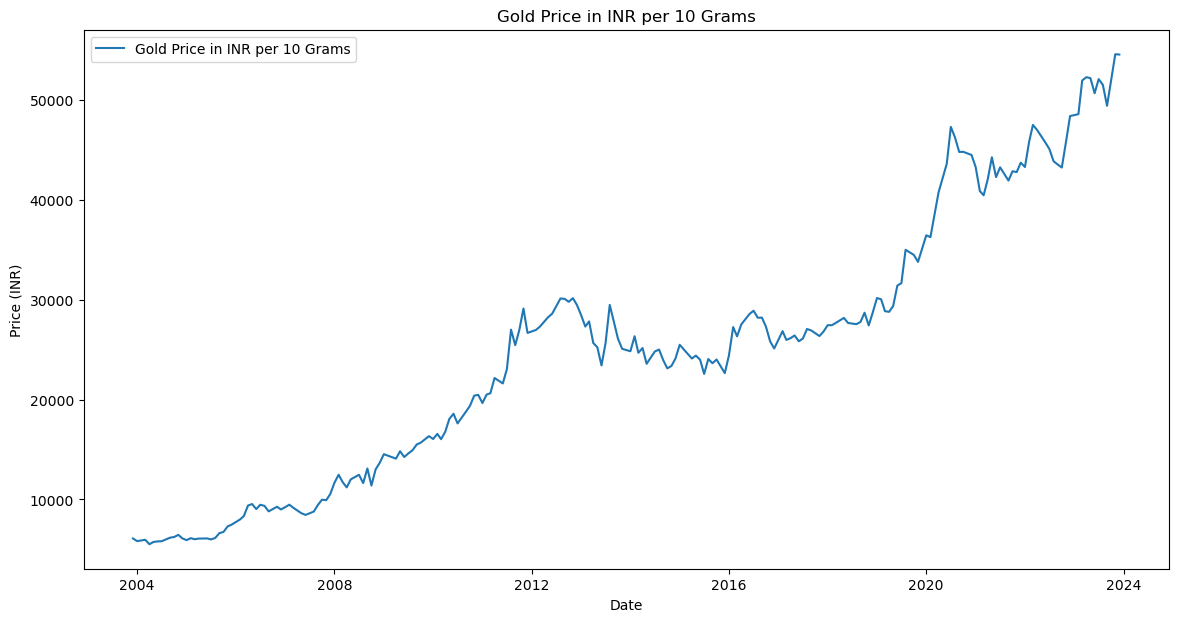

In [97]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define tickers
gold_usd_ticker = 'GC=F'  # Gold price in USD
inr_usd_ticker = 'INR=X'  # INR/USD exchange rate

# Fetch data
gold_usd_data = yf.download(gold_usd_ticker, start='2000-01-01', end='2024-01-01', interval='1mo', progress=False)
inr_usd_data = yf.download(inr_usd_ticker, start='2000-01-01', end='2024-01-01', interval='1mo', progress=False)

# Keep necessary columns
gold_usd_data = gold_usd_data[['Close']].rename(columns={'Close': 'Gold Price USD'})
inr_usd_data = inr_usd_data[['Close']].rename(columns={'Close': 'INR/USD'})

# Merge data
data = gold_usd_data.join(inr_usd_data)

# Drop rows with NaN values
data = data.dropna()

# Convert Gold Price to INR per ounce
data['Gold Price INR'] = data['Gold Price USD'] * data['INR/USD']

# Convert from per ounce to per gram
data['Gold Price INR per Gram'] = data['Gold Price INR'] / 31.1035

# Convert from per gram to per 10 grams
data['Gold Price INR per 10 Grams'] = data['Gold Price INR per Gram'] * 10

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Gold Price INR per 10 Grams'], label='Gold Price in INR per 10 Grams')
plt.title('Gold Price in INR per 10 Grams')
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.legend()
plt.show()


Epoch 1/100


C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\1639625009.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['GC=F'] = gold_data['Close']
C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\1639625009.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['Gold_INR'] = close_prices['GC=F'] * close_prices['INR=X'] / 10  # Assuming gold is quoted per ounce
C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 0.3765
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0526
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0183
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0422
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0486
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0136 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0160 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0263
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0080 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0097 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0139 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0085
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0041
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0094
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0098
Epoch 16/100
2/2 ━━━━━━━━

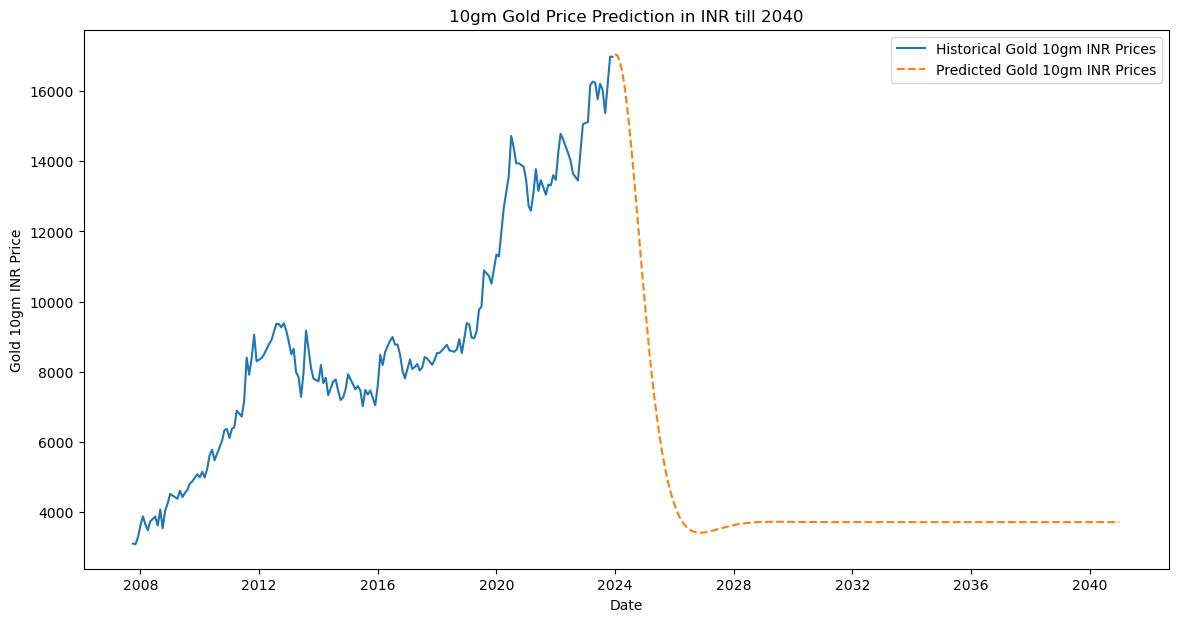

Prediction completed and saved.


In [109]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Fetch data for the last 20 years with monthly frequency
start_date = '2004-01-01'
end_date = '2024-01-01'

# Download the data for required tickers
tickers = ['INR=X', '^NSEI', '^IXIC', '^GSPC', '^FTSE', '^N225', '^HSI', '^STOXX50E', '^AXJO', '^BVSP']

# Download the data
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)
close_prices = data['Close']

# Download gold price separately
gold_data = yf.download('GC=F', start=start_date, end=end_date, interval='1mo', progress=False)

# Add the 'GC=F' data to close_prices
close_prices['GC=F'] = gold_data['Close']

# Calculate 10gm gold price in INR
close_prices['Gold_INR'] = close_prices['GC=F'] * close_prices['INR=X'] / 10  # Assuming gold is quoted per ounce

# Drop unnecessary columns after calculating Gold_INR
close_prices = close_prices[['Gold_INR'] + [col for col in close_prices.columns if col != 'Gold_INR']]

# Drop rows with NaN values
close_prices = close_prices.dropna()

# Check if there is data to scale
look_back = 60  # Number of previous periods (months) to consider for prediction

if close_prices.empty or len(close_prices) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Gold_INR' price
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Gold_INR' price 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Gold_INR'

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=close_prices.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted 'Gold_INR'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, 0] = predicted_prices  # Fill only the 'Gold_INR' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, 0]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Gold_INR'])

# Plot the predictions for 'Gold_INR'
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices['Gold_INR'], label='Historical Gold 10gm INR Prices')
plt.plot(future_df.index, future_df['Gold_INR'], label='Predicted Gold 10gm INR Prices', linestyle='--')
plt.title('10gm Gold Price Prediction in INR till 2040')
plt.xlabel('Date')
plt.ylabel('Gold 10gm INR Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_10gm_inr_predictions_till_2040.csv')
print("Prediction completed and saved.")


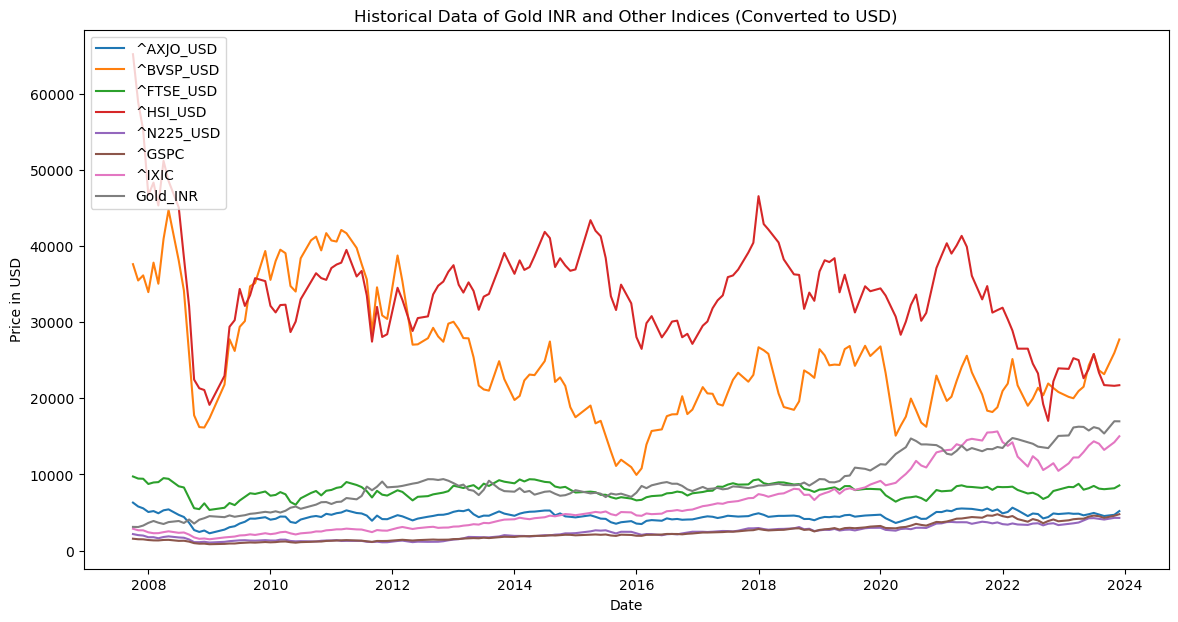

In [121]:
# List of foreign exchange rates needed
fx_tickers = ['AUDUSD=X', 'BRLUSD=X', 'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'EURUSD=X']

# Download the data
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Rename columns for easier access
fx_data.columns = ['AUD/USD', 'BRL/USD', 'GBP/USD', 'HKD/USD', 'JPY/USD', 'EUR/USD']

# Ensure all indexes and currencies are aligned by dropping rows with any missing data
aligned_data = close_prices.join(fx_data).dropna()

# Convert each index to USD
aligned_data['^AXJO_USD'] = aligned_data['^AXJO'] * aligned_data['AUD/USD']
aligned_data['^BVSP_USD'] = aligned_data['^BVSP'] * aligned_data['BRL/USD']
aligned_data['^FTSE_USD'] = aligned_data['^FTSE'] * aligned_data['GBP/USD']
aligned_data['^HSI_USD'] = aligned_data['^HSI'] * aligned_data['HKD/USD']
aligned_data['^N225_USD'] = aligned_data['^N225'] * aligned_data['JPY/USD']

# For EUR-based indexes like STOXX50E (if needed):
aligned_data['^STOXX50E_USD'] = aligned_data['^STOXX50E'] * aligned_data['EUR/USD']

# Keep only the USD-transformed columns and 'Gold_INR'
usd_indices = aligned_data[['^AXJO_USD', '^BVSP_USD', '^FTSE_USD', '^HSI_USD', '^N225_USD', '^GSPC', '^IXIC', 'Gold_INR']]

plt.figure(figsize=(14, 7))

for column in usd_indices.columns:
    plt.plot(usd_indices.index, usd_indices[column], label=column)

plt.title('Historical Data of Gold INR and Other Indices (Converted to USD)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()



Epoch 1/100


C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3631307912.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['GC=F'] = gold_data['Close']
C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3631307912.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_prices['Gold_INR'] = close_prices['GC=F'] * close_prices['INR=X'] / 10  # Assuming gold is quoted per ounce
C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.3490
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0146 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0293 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0339
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0442 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0126 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0164 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0186 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0077 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0111 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0102 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0053
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0072 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0069 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0042
Epoch 16/100
2/2 ━━━

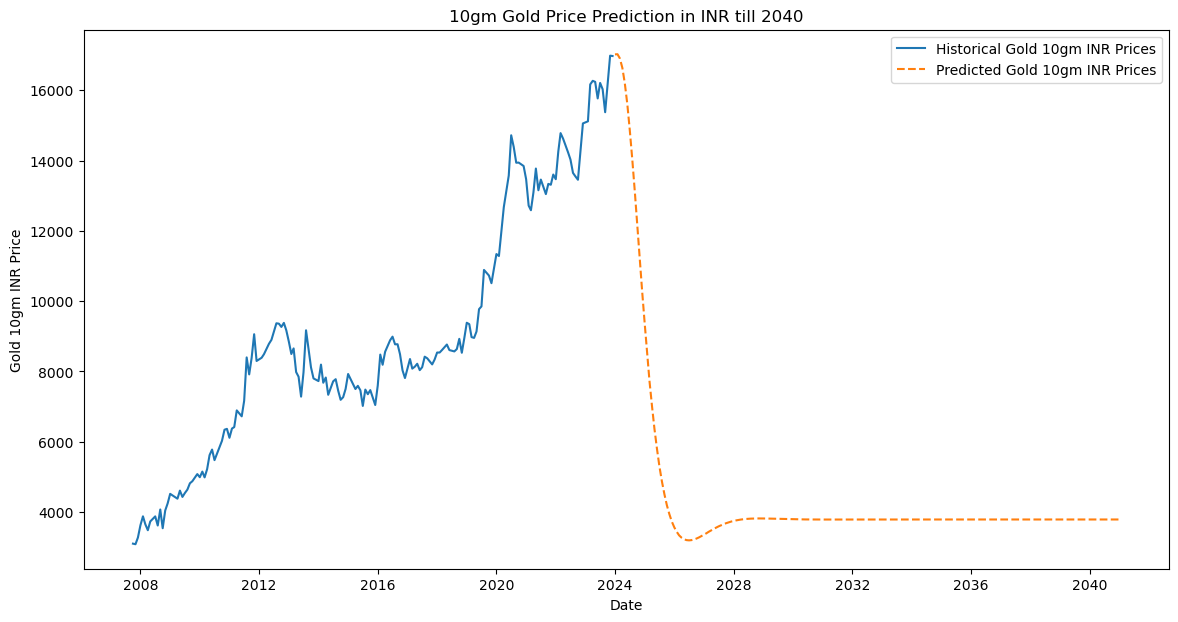

Prediction completed and saved.


In [123]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Fetch data for the last 20 years with monthly frequency
start_date = '2004-01-01'
end_date = '2024-01-01'

# Download the data for required tickers
tickers = ['INR=X', '^NSEI', '^IXIC', '^GSPC', '^FTSE', '^N225', '^HSI', '^STOXX50E', '^AXJO', '^BVSP']

# Download the data
data = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)
close_prices = data['Close']

# Download gold price separately
gold_data = yf.download('GC=F', start=start_date, end=end_date, interval='1mo', progress=False)

# Add the 'GC=F' data to close_prices
close_prices['GC=F'] = gold_data['Close']

# Calculate 10gm gold price in INR
close_prices['Gold_INR'] = close_prices['GC=F'] * close_prices['INR=X'] / 10  # Assuming gold is quoted per ounce

# Drop unnecessary columns after calculating Gold_INR
close_prices = close_prices[['Gold_INR'] + [col for col in close_prices.columns if col != 'Gold_INR']]

# Drop rows with NaN values
close_prices = close_prices.dropna()

# Check if there is data to scale
look_back = 60  # Number of previous periods (months) to consider for prediction

if close_prices.empty or len(close_prices) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Gold_INR' price
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Gold_INR' price 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Gold_INR'

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=close_prices.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back days of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted 'Gold_INR'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, 0] = predicted_prices  # Fill only the 'Gold_INR' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, 0]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Gold_INR'])

# Plot the predictions for 'Gold_INR'
plt.figure(figsize=(14, 7))
plt.plot(close_prices.index, close_prices['Gold_INR'], label='Historical Gold 10gm INR Prices')
plt.plot(future_df.index, future_df['Gold_INR'], label='Predicted Gold 10gm INR Prices', linestyle='--')
plt.title('10gm Gold Price Prediction in INR till 2040')
plt.xlabel('Date')
plt.ylabel('Gold 10gm INR Price')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_10gm_inr_predictions_till_2040.csv')
print("Prediction completed and saved.")


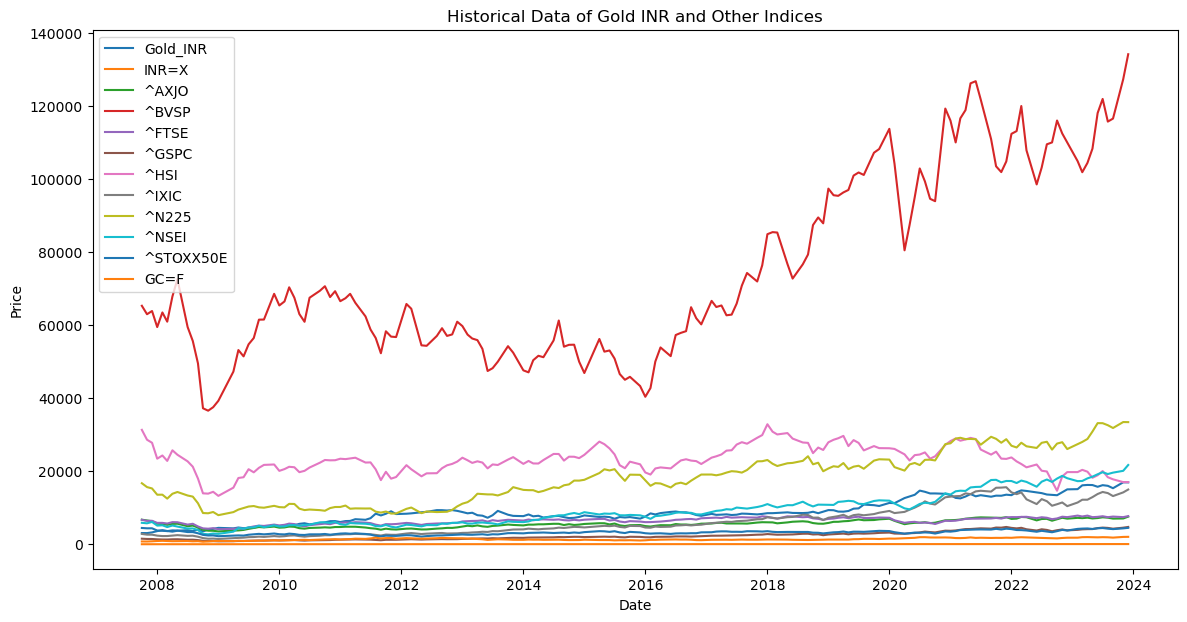

In [125]:
import matplotlib.pyplot as plt

# Plot all the features in the close_prices DataFrame
plt.figure(figsize=(14, 7))

for column in close_prices.columns:
    plt.plot(close_prices.index, close_prices[column], label=column)

plt.title('Historical Data of Gold INR and Other Indices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()


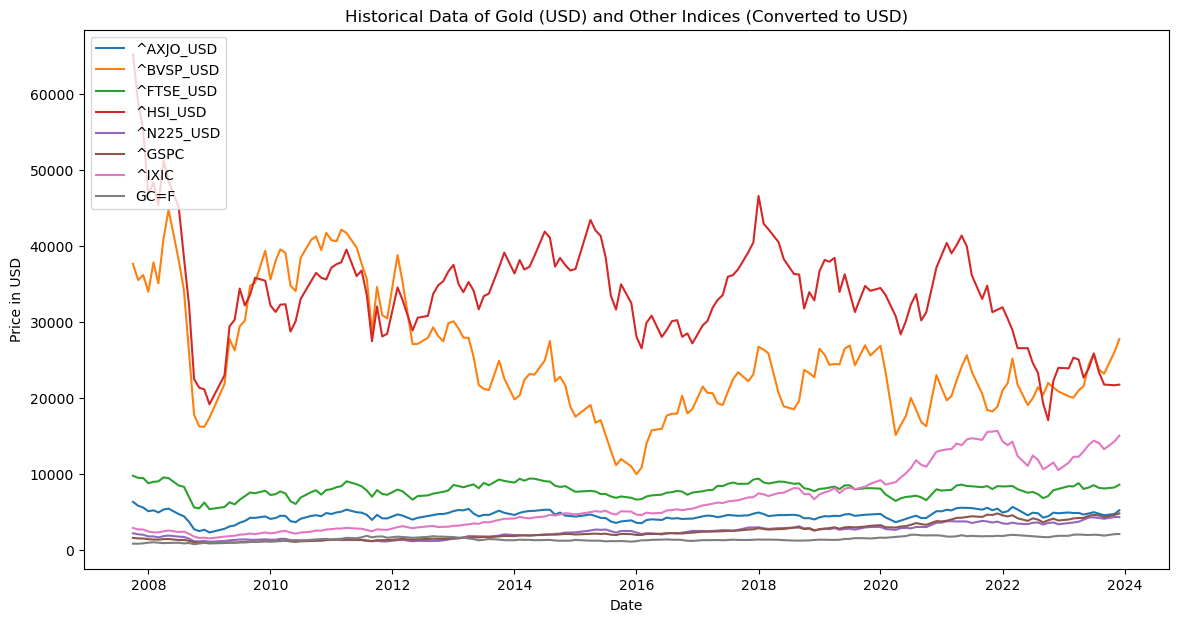

In [127]:
# List of foreign exchange rates needed
fx_tickers = ['AUDUSD=X', 'BRLUSD=X', 'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'EURUSD=X']

# Download the data
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Rename columns for easier access
fx_data.columns = ['AUD/USD', 'BRL/USD', 'GBP/USD', 'HKD/USD', 'JPY/USD', 'EUR/USD']

# Ensure all indexes and currencies are aligned by dropping rows with any missing data
aligned_data = close_prices.join(fx_data).dropna()

# Convert each index to USD
aligned_data['^AXJO_USD'] = aligned_data['^AXJO'] * aligned_data['AUD/USD']
aligned_data['^BVSP_USD'] = aligned_data['^BVSP'] * aligned_data['BRL/USD']
aligned_data['^FTSE_USD'] = aligned_data['^FTSE'] * aligned_data['GBP/USD']
aligned_data['^HSI_USD'] = aligned_data['^HSI'] * aligned_data['HKD/USD']
aligned_data['^N225_USD'] = aligned_data['^N225'] * aligned_data['JPY/USD']

# For EUR-based indexes like STOXX50E (if needed):
aligned_data['^STOXX50E_USD'] = aligned_data['^STOXX50E'] * aligned_data['EUR/USD']

# Keep only the USD-transformed columns and 'GC=F' (Gold in USD)
usd_indices = aligned_data[['^AXJO_USD', '^BVSP_USD', '^FTSE_USD', '^HSI_USD', '^N225_USD', '^GSPC', '^IXIC', 'GC=F']]

plt.figure(figsize=(14, 7))

for column in usd_indices.columns:
    plt.plot(usd_indices.index, usd_indices[column], label=column)

plt.title('Historical Data of Gold (USD) and Other Indices (Converted to USD)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()


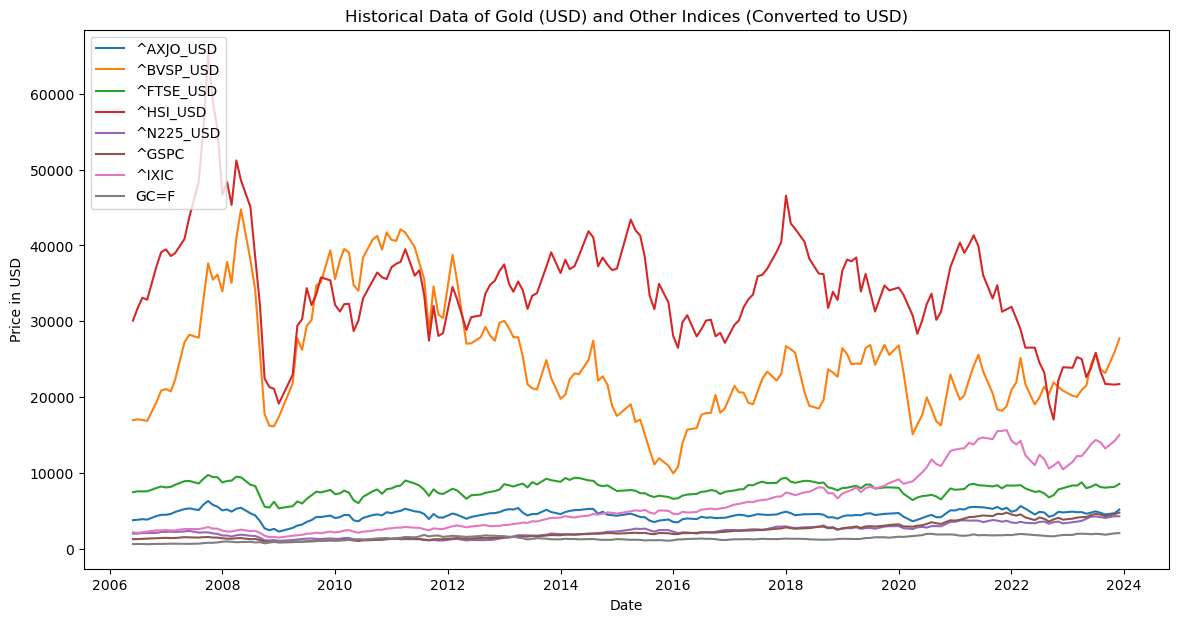

X Shape: (120, 60, 8)
y Shape: (120,)


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - loss: 0.4109
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 241ms/step - loss: 0.1578
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0401
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - loss: 0.1399
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 0.1220
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step - loss: 0.0416
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step - loss: 0.0700
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step - loss: 0.0436
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 253ms/step - loss: 0.0389
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - loss: 0.0505
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - loss: 0.0424
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 350ms/step - loss: 0.0322
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step - loss: 0.0332
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step - loss: 0.0313
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0185
Epo

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\2629568769.py:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='M')


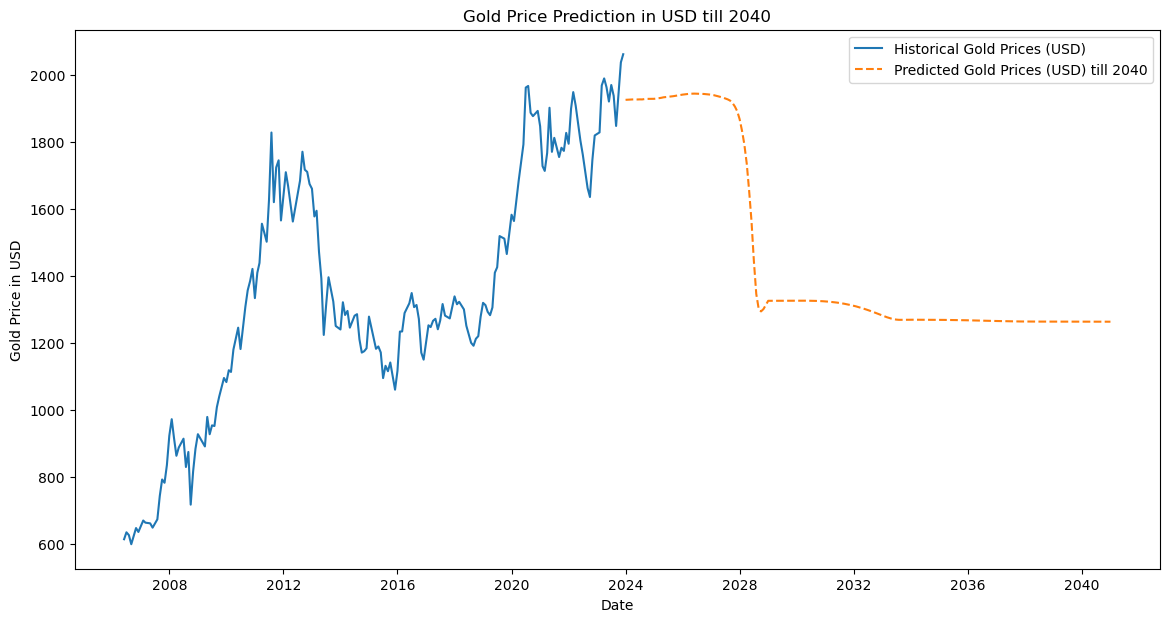

Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.


In [129]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define the start and end date
start_date = '2004-01-01'
end_date = '2024-01-01'

# Tickers for the indices
tickers = ['GC=F', '^AXJO', '^BVSP', '^FTSE', '^GSPC', '^HSI', '^IXIC', '^N225']

# Download data for the indices
close_prices = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Download foreign exchange rates against USD
fx_tickers = ['AUDUSD=X', 'BRLUSD=X', 'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'EURUSD=X']
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']
fx_data.columns = ['AUD/USD', 'BRL/USD', 'GBP/USD', 'HKD/USD', 'JPY/USD', 'EUR/USD']

# Merge close prices and exchange rates
aligned_data = close_prices.join(fx_data).dropna()

# Convert indices to USD
aligned_data['^AXJO_USD'] = aligned_data['^AXJO'] * aligned_data['AUD/USD']
aligned_data['^BVSP_USD'] = aligned_data['^BVSP'] * aligned_data['BRL/USD']
aligned_data['^FTSE_USD'] = aligned_data['^FTSE'] * aligned_data['GBP/USD']
aligned_data['^HSI_USD'] = aligned_data['^HSI'] * aligned_data['HKD/USD']
aligned_data['^N225_USD'] = aligned_data['^N225'] * aligned_data['JPY/USD']

# Select relevant columns
usd_indices = aligned_data[['^AXJO_USD', '^BVSP_USD', '^FTSE_USD', '^HSI_USD', '^N225_USD', '^GSPC', '^IXIC', 'GC=F']]

# Drop any remaining NaN values
usd_indices = usd_indices.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
for column in usd_indices.columns:
    plt.plot(usd_indices.index, usd_indices[column], label=column)
plt.title('Historical Data of Gold (USD) and Other Indices (Converted to USD)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if usd_indices.empty or len(usd_indices) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(usd_indices)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'GC=F' price
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, -1])  # Predict only 'GC=F' price

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'GC=F' (Gold/USD)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='M')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, -1] = prediction[0, 0]  # Update with predicted 'GC=F'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the 'GC=F' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['GC=F'])

# Plot the predictions for 'GC=F'
plt.figure(figsize=(14, 7))
plt.plot(usd_indices.index, usd_indices['GC=F'], label='Historical Gold Prices (USD)')
plt.plot(future_df.index, future_df['GC=F'], label='Predicted Gold Prices (USD) till 2040', linestyle='--')
plt.title('Gold Price Prediction in USD till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price in USD')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.")


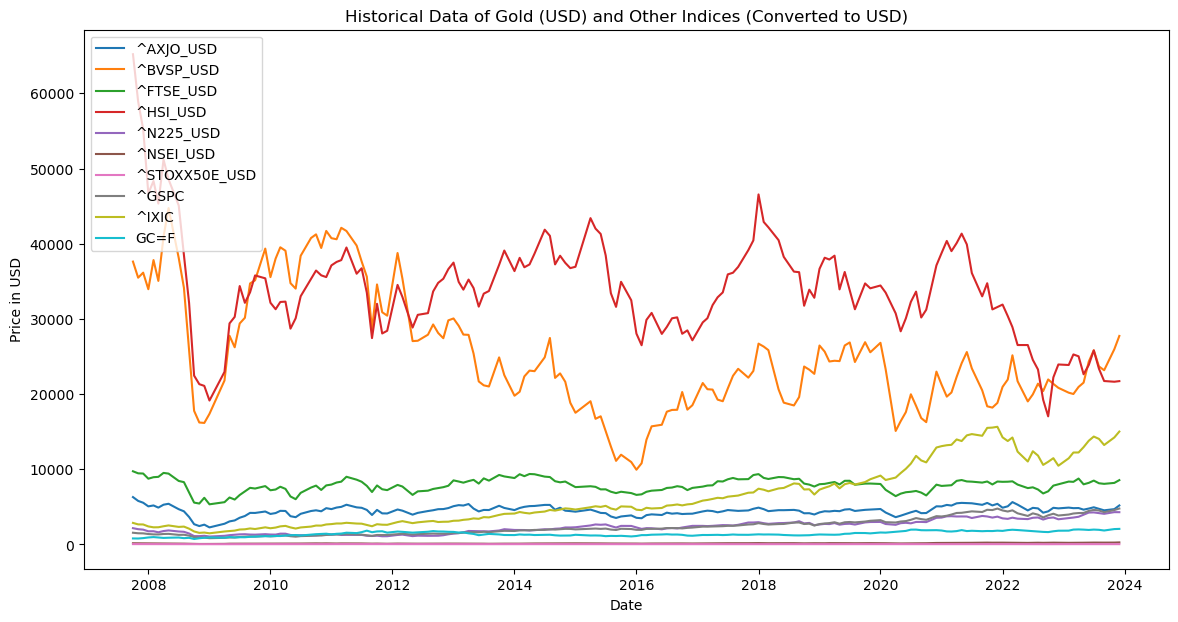

X Shape: (107, 60, 10)
y Shape: (107,)


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 333ms/step - loss: 0.3672
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 391ms/step - loss: 0.0661
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 497ms/step - loss: 0.0490
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - loss: 0.0635
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - loss: 0.0426
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - loss: 0.0358
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 359ms/step - loss: 0.0231
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 348ms/step - loss: 0.0143
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - loss: 0.0129
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - loss: 0.0276
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 372ms/step - loss: 0.0111
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - loss: 0.0101
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 306ms/step - loss: 0.0104
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 331ms/step - loss: 0.0091
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - loss: 0.0089
Epoch 16/50
2/2 ━━

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3512969709.py:103: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='M')


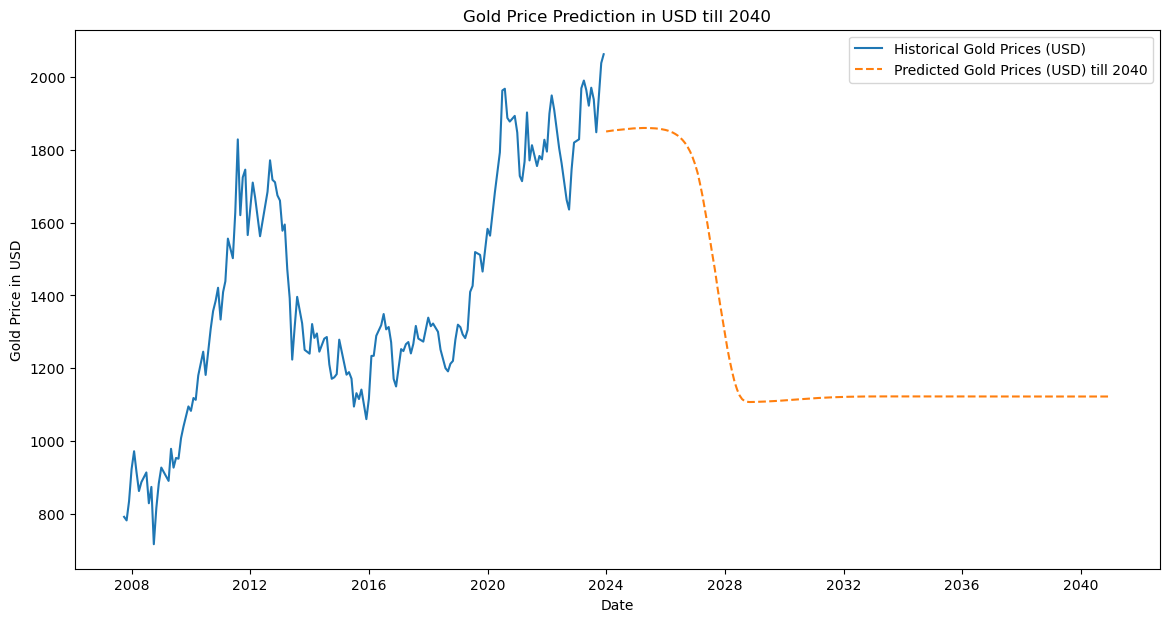

Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.


In [142]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define the start and end date
start_date = '2004-01-01'
end_date = '2024-01-01'

# List of 10 global stock indices including NIFTY50
tickers = ['GC=F', '^AXJO', '^BVSP', '^FTSE', '^GSPC', '^HSI', '^IXIC', '^N225', '^NSEI', '^STOXX50E']

# Download data for the indices
close_prices = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Download foreign exchange rates against USD for necessary currencies
fx_tickers = ['AUDUSD=X', 'BRLUSD=X', 'GBPUSD=X', 'HKDUSD=X', 'JPYUSD=X', 'INRUSD=X', 'EURUSD=X']
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']
fx_data.columns = ['AUD/USD', 'BRL/USD', 'GBP/USD', 'HKD/USD', 'JPY/USD', 'INR/USD', 'EUR/USD']

# Merge close prices and exchange rates
aligned_data = close_prices.join(fx_data).dropna()

# Convert indices to USD
aligned_data['^AXJO_USD'] = aligned_data['^AXJO'] * aligned_data['AUD/USD']
aligned_data['^BVSP_USD'] = aligned_data['^BVSP'] * aligned_data['BRL/USD']
aligned_data['^FTSE_USD'] = aligned_data['^FTSE'] * aligned_data['GBP/USD']
aligned_data['^HSI_USD'] = aligned_data['^HSI'] * aligned_data['HKD/USD']
aligned_data['^N225_USD'] = aligned_data['^N225'] * aligned_data['JPY/USD']
aligned_data['^NSEI_USD'] = aligned_data['^NSEI'] * aligned_data['INR/USD']
aligned_data['^STOXX50E_USD'] = aligned_data['^STOXX50E'] * aligned_data['EUR/USD']

# Select relevant columns
usd_indices = aligned_data[['^AXJO_USD', '^BVSP_USD', '^FTSE_USD', '^HSI_USD', '^N225_USD', '^NSEI_USD', '^STOXX50E_USD', '^GSPC', '^IXIC', 'GC=F']]

# Drop any remaining NaN values
usd_indices = usd_indices.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
for column in usd_indices.columns:
    plt.plot(usd_indices.index, usd_indices[column], label=column)
plt.title('Historical Data of Gold (USD) and Other Indices (Converted to USD)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if usd_indices.empty or len(usd_indices) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(usd_indices)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'GC=F' price (Gold in USD)
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, -1])  # Predict only 'GC=F' price

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'GC=F' (Gold/USD)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=50, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='ME')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, -1] = prediction[0, 0]  # Update with predicted 'GC=F'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the 'GC=F' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['GC=F'])

# Plot the predictions for 'GC=F'
plt.figure(figsize=(14, 7))
plt.plot(usd_indices.index, usd_indices['GC=F'], label='Historical Gold Prices (USD)')
plt.plot(future_df.index, future_df['GC=F'], label='Predicted Gold Prices (USD) till 2040', linestyle='--')
plt.title('Gold Price Prediction in USD till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price in USD')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.")


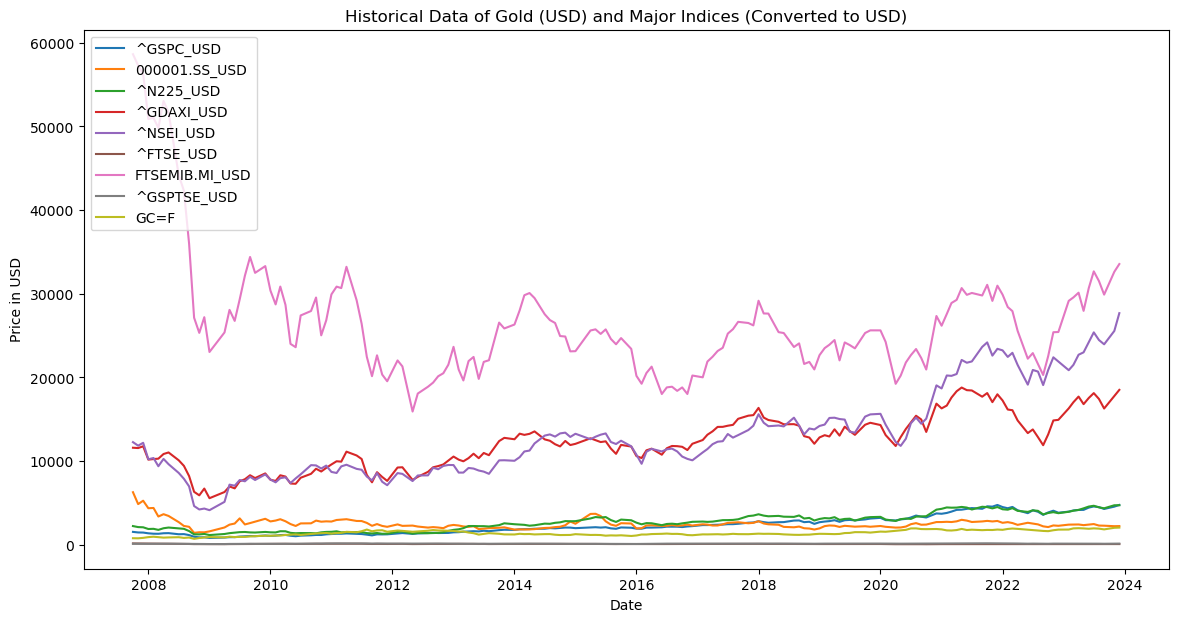

X Shape: (107, 60, 9)
y Shape: (107,)


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 434ms/step - loss: 0.3718
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 479ms/step - loss: 0.1289
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - loss: 0.0326
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - loss: 0.1584
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - loss: 0.1685
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - loss: 0.1110
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - loss: 0.0336
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 424ms/step - loss: 0.0851
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 436ms/step - loss: 0.0376
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - loss: 0.0437
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 392ms/step - loss: 0.0538
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - loss: 0.0410
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 435ms/step - loss: 0.0240
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - loss: 0.0242
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 453ms/step - loss: 0.0351
Epo

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\155095399.py:135: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='M')


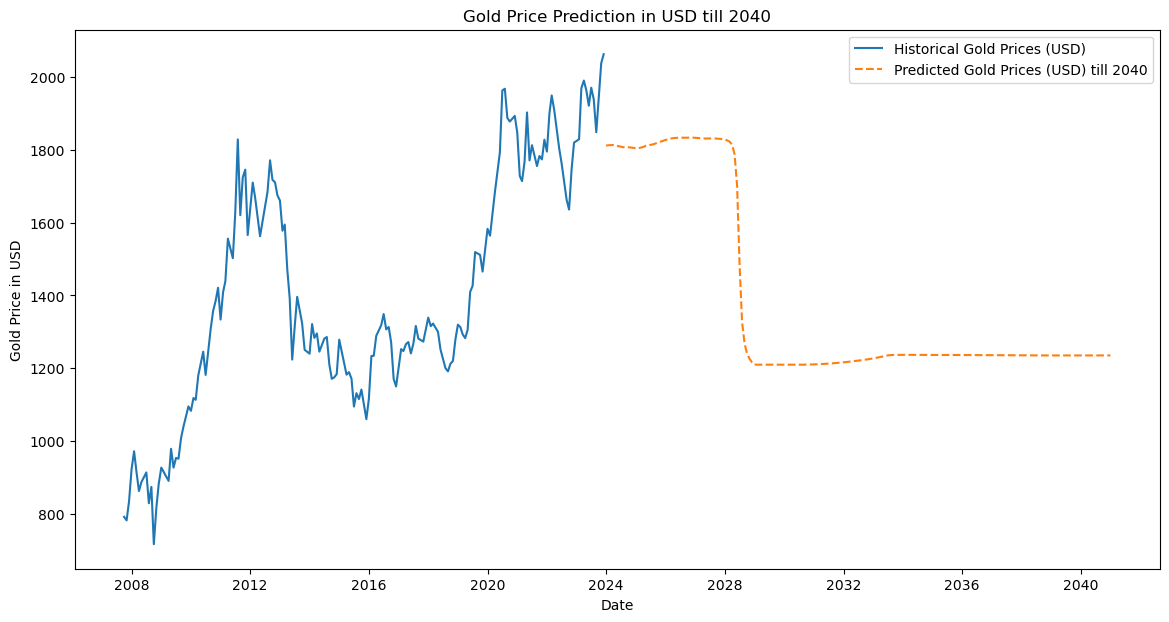

Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.


In [149]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define the start and end date
start_date = '2004-01-01'
end_date = '2024-01-01'

# List of top 10 global stock indices
tickers = [
    'GC=F',  # Gold (USD)
    '^GSPC', # S&P 500 (US)
    '000001.SS', # Shanghai Composite (China)
    '^N225', # Nikkei 225 (Japan)
    '^GDAXI',# DAX (Germany)
    '^NSEI', # NIFTY 50 (India)
    '^FTSE', # FTSE 100 (UK)
    'FTSEMIB.MI',# FTSE MIB (Italy)
    '^GSPTSE' # TSX Composite (Canada)
]

# Download data for the indices
close_prices = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Download foreign exchange rates against USD for necessary currencies
fx_tickers = ['CNYUSD=X', 'JPYUSD=X', 'EURUSD=X', 'INRUSD=X', 'GBPUSD=X', 'CADUSD=X']
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']
fx_data.columns = ['CNY/USD', 'JPY/USD', 'EUR/USD', 'INR/USD', 'GBP/USD', 'CAD/USD']

# Merge close prices and exchange rates
aligned_data = close_prices.join(fx_data).dropna()

# Handle missing indices
for ticker in ['000001.SS', '^GDAXI', '^FCHI', 'FTSEMIB.MI', '^GSPTSE']:
    if ticker not in aligned_data.columns:
        aligned_data[ticker] = np.nan

# Define exchange rate mappings
exchange_rate_columns = {
    '^GSPC': None,  # No conversion needed
    '000001.SS': 'CNY/USD',
    '^N225': 'JPY/USD',
    '^GDAXI': 'EUR/USD',
    '^NSEI': 'INR/USD',
    '^FTSE': 'GBP/USD',
    'FTSEMIB.MI': 'EUR/USD',
    '^GSPTSE': 'CAD/USD'
}

# Convert indices to USD
for ticker, rate in exchange_rate_columns.items():
    if rate:
        if rate in aligned_data.columns:
            aligned_data[ticker + '_USD'] = aligned_data[ticker] * aligned_data[rate]
        else:
            # Use original if no conversion rate is available
            aligned_data[ticker + '_USD'] = aligned_data[ticker]  # No conversion applied
    else:
        # Use original if no conversion is needed
        aligned_data[ticker + '_USD'] = aligned_data[ticker]

# Select relevant columns
usd_indices = aligned_data[[col for col in aligned_data.columns if '_USD' in col] + ['GC=F']]

# Drop any remaining NaN values
usd_indices = usd_indices.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
for column in usd_indices.columns:
    plt.plot(usd_indices.index, usd_indices[column], label=column)
plt.title('Historical Data of Gold (USD) and Major Indices (Converted to USD)')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.legend(loc='upper left')
plt.show()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if usd_indices.empty or len(usd_indices) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(usd_indices)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'GC=F' price (Gold in USD)
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, -1])  # Predict only 'GC=F' price

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'GC=F' (Gold/USD)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=usd_indices.index[-1], end='2040-12-31', freq='M')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, -1] = prediction[0, 0]  # Update with predicted 'GC=F'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the 'GC=F' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['GC=F'])

# Plot the predictions for 'GC=F'
plt.figure(figsize=(14, 7))
plt.plot(usd_indices.index, usd_indices['GC=F'], label='Historical Gold Prices (USD)')
plt.plot(future_df.index, future_df['GC=F'], label='Predicted Gold Prices (USD) till 2040', linestyle='--')
plt.title('Gold Price Prediction in USD till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price in USD')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.")


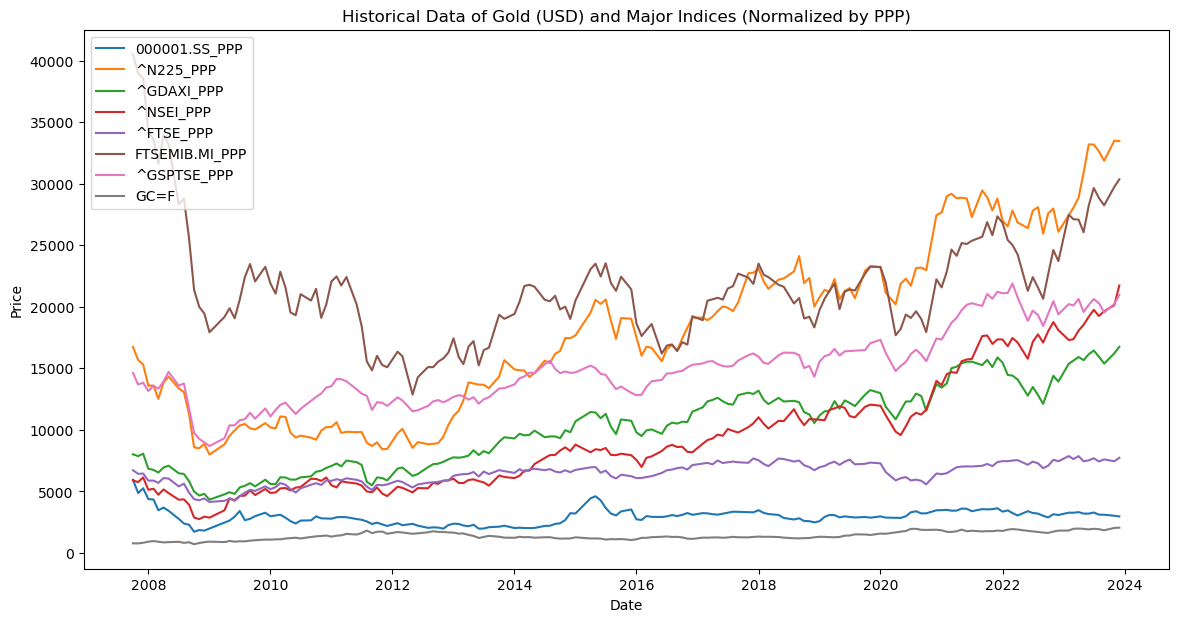

X Shape: (107, 60, 8)
y Shape: (107,)
Epoch 1/100


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - loss: 0.4049
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - loss: 0.0523
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0325
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0753
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 206ms/step - loss: 0.0761
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - loss: 0.0327
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0321
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - loss: 0.0397
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0219
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - loss: 0.0293
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 0.0291
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step - loss: 0.0196
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0216
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0246
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - loss: 0.0163
Epoch 16/100
2/2

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\1170715786.py:120: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=ppp_normalized_data.index[-1], end='2040-12-31', freq='M')


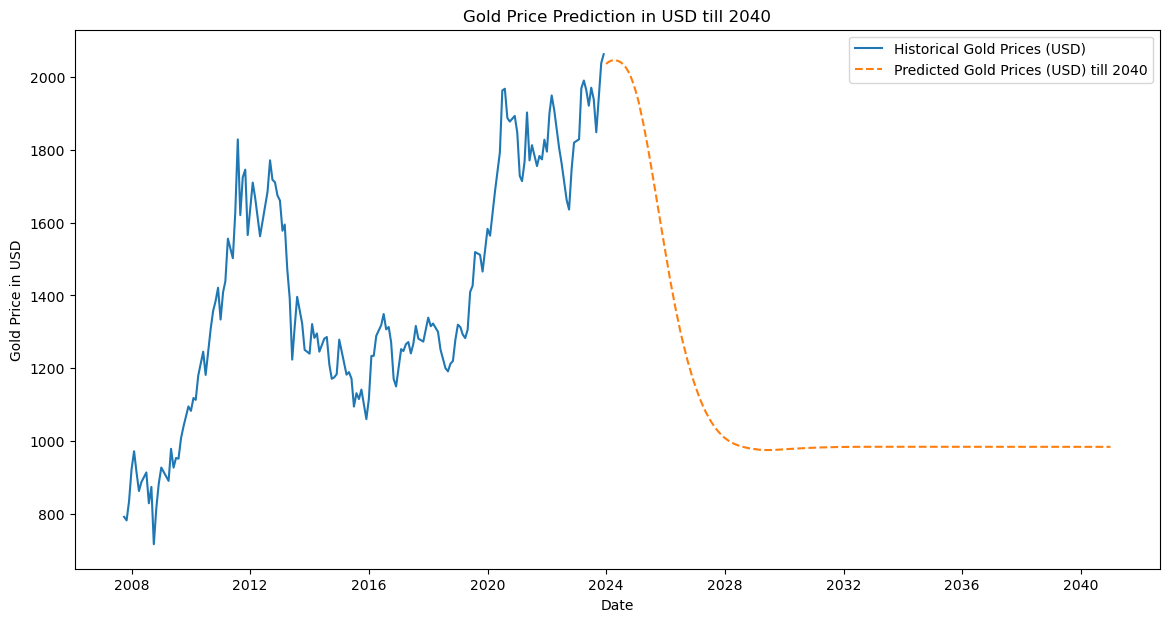

Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.


In [151]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define the start and end date
start_date = '2004-01-01'
end_date = '2024-01-01'

# List of top 10 global stock indices
tickers = [
    'GC=F',  # Gold (USD)
    '^GSPC', # S&P 500 (US)
    '000001.SS', # Shanghai Composite (China)
    '^N225', # Nikkei 225 (Japan)
    '^GDAXI',# DAX (Germany)
    '^NSEI', # NIFTY 50 (India)
    '^FTSE', # FTSE 100 (UK)
    'FTSEMIB.MI',# FTSE MIB (Italy)
    '^GSPTSE' # TSX Composite (Canada)
]

# Download data for the indices
close_prices = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Download foreign exchange rates against USD for necessary currencies
fx_tickers = ['CNYUSD=X', 'JPYUSD=X', 'EURUSD=X', 'INRUSD=X', 'GBPUSD=X', 'CADUSD=X']
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']
fx_data.columns = ['CNY/USD', 'JPY/USD', 'EUR/USD', 'INR/USD', 'GBP/USD', 'CAD/USD']

# PPP data (assuming you have PPP index data or proxy; replace with actual PPP data source)
# Example PPP index for demonstration, replace with actual data
ppp_data = pd.DataFrame({
    'CNY/PPP': 3.64,  # Placeholder value
    'JPY/PPP': 94.68,  # Placeholder value
    'EUR/PPP': 0.70,  # Placeholder value
    'INR/PPP': 20.22,  # Placeholder value
    'GBP/PPP': 0.67,  # Placeholder value
    'CAD/PPP': 1.17   # Placeholder value
}, index=fx_data.index)

# Normalize the indices using PPP
aligned_data = close_prices.join(fx_data).dropna()
for ticker in ['000001.SS', '^N225', '^GDAXI', '^NSEI', '^FTSE', 'FTSEMIB.MI', '^GSPTSE']:
    currency = ticker.split('_')[0] if ticker.split('_')[0] in fx_data.columns else None
    if currency and currency in ppp_data.columns:
        aligned_data[ticker + '_PPP'] = aligned_data[ticker] / ppp_data[currency + '/PPP']
    else:
        aligned_data[ticker + '_PPP'] = aligned_data[ticker]  # No PPP normalization needed

# Add Gold prices to the dataset
aligned_data['GC=F'] = close_prices['GC=F']

# Select relevant columns
ppp_normalized_data = aligned_data[[col for col in aligned_data.columns if '_PPP' in col] + ['GC=F']]

# Drop any remaining NaN values
ppp_normalized_data = ppp_normalized_data.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
for column in ppp_normalized_data.columns:
    plt.plot(ppp_normalized_data.index, ppp_normalized_data[column], label=column)
plt.title('Historical Data of Gold (USD) and Major Indices (Normalized by PPP)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if ppp_normalized_data.empty or len(ppp_normalized_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(ppp_normalized_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'GC=F' price (Gold in USD)
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, -1])  # Predict only 'GC=F' price

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'GC=F' (Gold/USD)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=ppp_normalized_data.index[-1], end='2040-12-31', freq='ME')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, -1] = prediction[0, 0]  # Update with predicted 'GC=F'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the 'GC=F' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['GC=F'])

# Plot the predictions for 'GC=F'
plt.figure(figsize=(14, 7))
plt.plot(ppp_normalized_data.index, ppp_normalized_data['GC=F'], label='Historical Gold Prices (USD)')
plt.plot(future_df.index, future_df['GC=F'], label='Predicted Gold Prices (USD) till 2040', linestyle='--')
plt.title('Gold Price Prediction in USD till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price in USD')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.")


Fetching data...


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 426ms/step - loss: 0.3660
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 376ms/step - loss: 0.1047
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 389ms/step - loss: 0.0439
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - loss: 0.0320
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - loss: 0.0308
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - loss: 0.0340
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step - loss: 0.0301
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 387ms/step - loss: 0.0163
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - loss: 0.0149
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 413ms/step - loss: 0.0166
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - loss: 0.0124
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - loss: 0.0107
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 405ms/step - loss: 0.0077
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 415ms/step - loss: 0.0066
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 422ms/step - loss: 0.0062
Epo

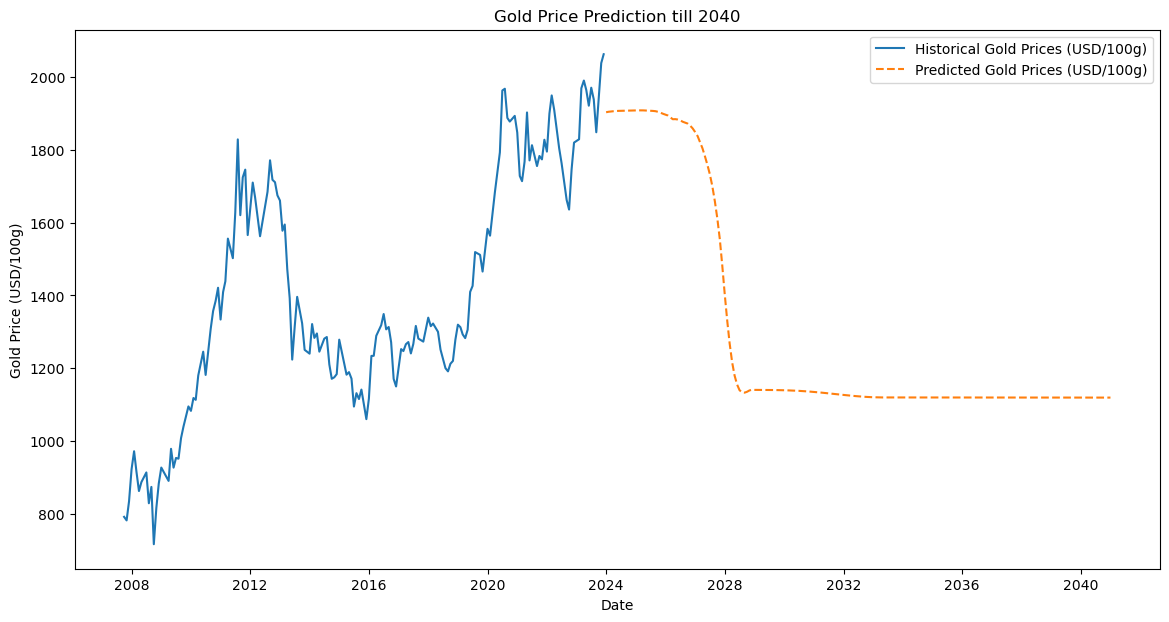

Download completed


In [155]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()

# Add exchange rates to aligned_data
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Convert indices to USD
for index in indexes:
    if index in aligned_data.columns:
        # Extract currency from index ticker if possible (assuming format ^INDEX)
        currency = index.split('^')[1] if '^' in index else None
        if currency and currency in exchange_data_processed:
            aligned_data[f'{index}_USD'] = aligned_data[index] * exchange_data_processed[currency]
        else:
            aligned_data[f'{index}_USD'] = aligned_data[index]

# Drop rows with NaN values
aligned_data = aligned_data.dropna()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if aligned_data.empty or len(aligned_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(aligned_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Close' price of gold
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Close' price of gold 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Close' price of gold

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted 'Close'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, 0] = predicted_prices  # Fill only the 'Close' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, 0]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the predictions for 'Close'
plt.figure(figsize=(14, 7))
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


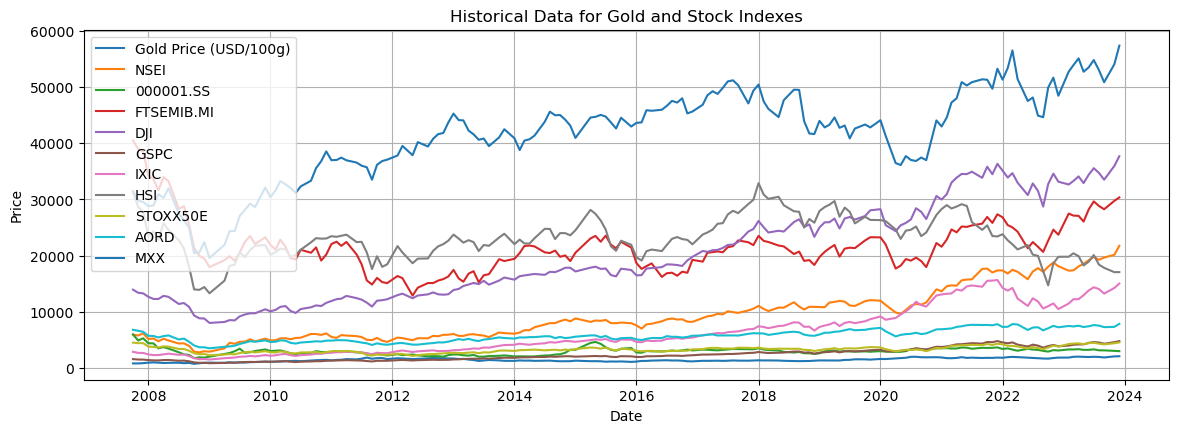

In [157]:
# Plot the training data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=index.split('^')[-1])

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)


Fetching data...


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - loss: 0.3781
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 460ms/step - loss: 0.2037
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 440ms/step - loss: 0.7306
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - loss: 0.0954
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 457ms/step - loss: 0.2126
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - loss: 0.2108
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - loss: 0.1710
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - loss: 0.0860
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step - loss: 0.0486
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - loss: 0.0609
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 481ms/step - loss: 0.0319
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - loss: 0.0391
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 556ms/step - loss: 0.0367
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - loss: 0.0259
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 486ms/step - loss: 0.0222
Epo

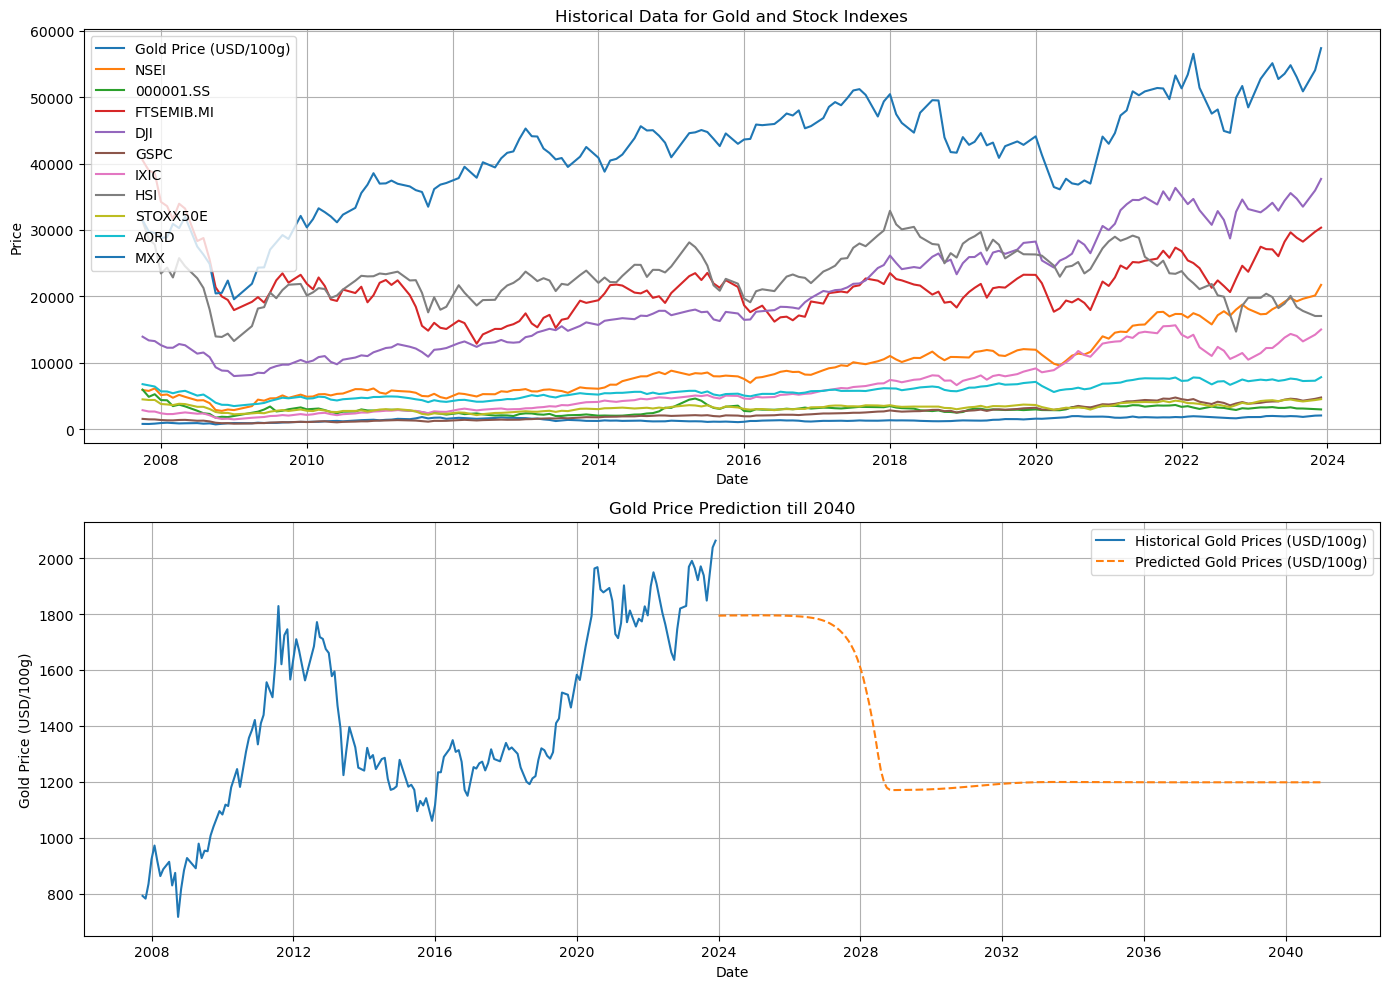

Download completed


In [165]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()

# Add exchange rates to aligned_data
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Convert indices to USD
for index in indexes:
    if index in aligned_data.columns:
        # Extract currency from index ticker if possible (assuming format ^INDEX)
        currency = index.split('^')[1] if '^' in index else None
        if currency and currency in exchange_data_processed:
            aligned_data[f'{index}_USD'] = aligned_data[index] * exchange_data_processed[currency]
        else:
            aligned_data[f'{index}_USD'] = aligned_data[index]

# Drop rows with NaN values
aligned_data = aligned_data.dropna()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if aligned_data.empty or len(aligned_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(aligned_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Close' price of gold
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Close' price of gold 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Close' price of gold

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted 'Close'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, 0] = predicted_prices  # Fill only the 'Close' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, 0]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the training data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=index.split('^')[-1])

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

# Plot the predictions
plt.subplot(2, 1, 2)
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


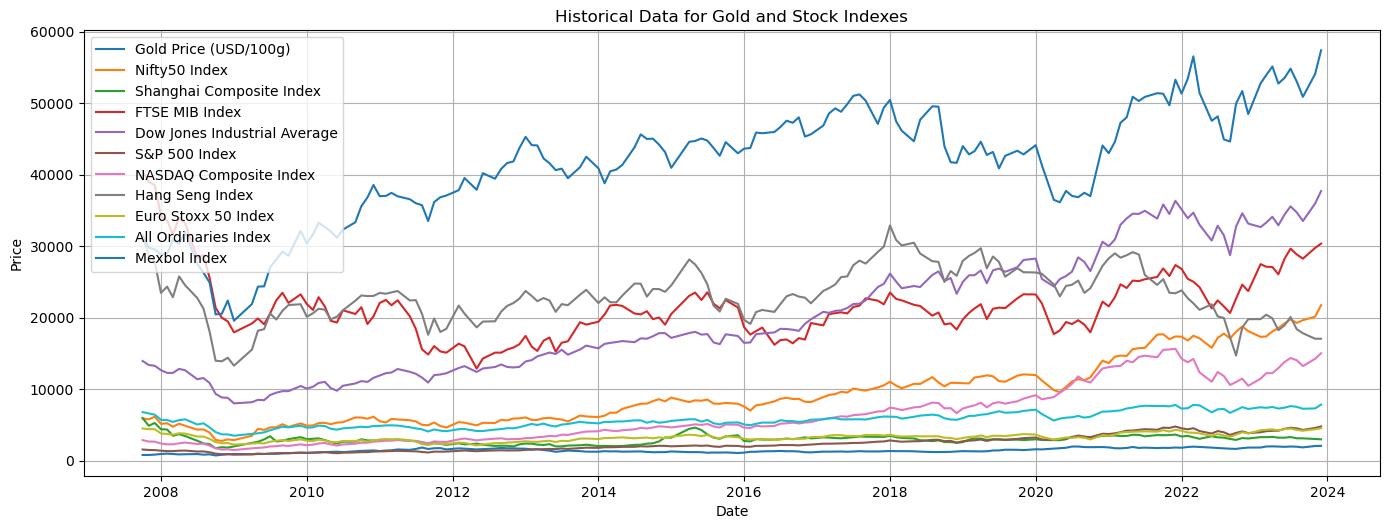

In [167]:
import matplotlib.pyplot as plt

# Dictionary to map tickers to full names
ticker_names = {
    '^NSEI': 'Nifty50 Index',
    '000001.SS': 'Shanghai Composite Index',
    'FTSEMIB.MI': 'FTSE MIB Index',
    '^DJI': 'Dow Jones Industrial Average',
    '^IXIC': 'NASDAQ Composite Index',
    '^GSPC': 'S&P 500 Index',
    '^HSI': 'Hang Seng Index',
    '^N225': 'Nikkei 225 Index',
    '^STOXX50E': 'Euro Stoxx 50 Index',
    '^AORD': 'All Ordinaries Index',
    '^MXX': 'Mexbol Index',
    '^TWII': 'Taiwan Weighted Index',
    '^KOSPI': 'KOSPI Index',
    '^TSX': 'TSX Composite Index',
    '^CAC': 'CAC 40 Index',
    '^DAX': 'DAX Index',
    '^SMI': 'SMI Index',
    '^AS51': 'ASX 200 Index'
}

# Plot the training data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=full_name)

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()


Fetching data...


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 874ms/step - loss: 0.3512
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 920ms/step - loss: 0.1146
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 900ms/step - loss: 0.0212
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 896ms/step - loss: 0.1356
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 948ms/step - loss: 0.1378
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 916ms/step - loss: 0.0884
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 916ms/step - loss: 0.0192
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 963ms/step - loss: 0.0843
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0369
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0177
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 924ms/step - loss: 0.0301
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - loss: 0.0344   
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 981ms/step - loss: 0.0288
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 923ms/step - loss: 0.0206
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 952ms/step - loss: 0.0171
Epoch 16/

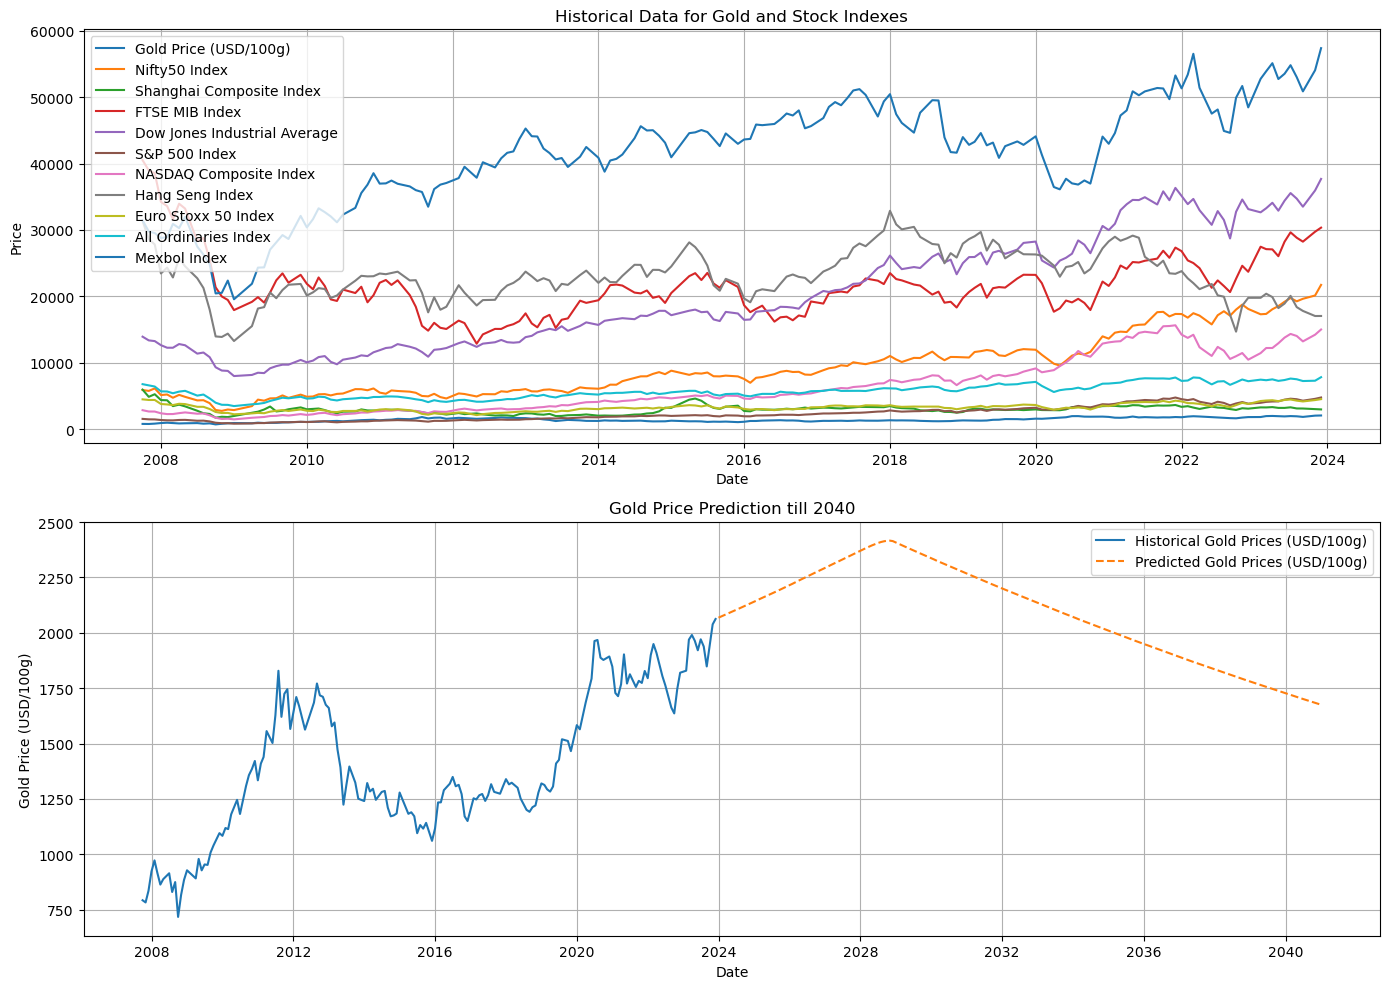

Download completed


In [171]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()

# Add exchange rates to aligned_data
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Convert indices to USD
for index in indexes:
    if index in aligned_data.columns:
        # Extract currency from index ticker if possible (assuming format ^INDEX)
        currency = index.split('^')[1] if '^' in index else None
        if currency and currency in exchange_data_processed:
            aligned_data[f'{index}_USD'] = aligned_data[index] * exchange_data_processed[currency]
        else:
            aligned_data[f'{index}_USD'] = aligned_data[index]

# Drop rows with NaN values
aligned_data = aligned_data.dropna()

# Plot the training data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=full_name)

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

# Calculate rate series (percentage change)
rate_series = aligned_data.pct_change().dropna()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if rate_series.empty or len(rate_series) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(rate_series)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Close' price rate of gold
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Close' price rate of gold 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Close' price rate of gold

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_rates = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next rate
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted rate

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_data.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates  # Fill only the 'Close' column with predictions
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Reconstruct the absolute gold prices
# Start with the latest known value
initial_value = gold_data['Close'].iloc[-1]
absolute_prices = [initial_value]

for rate in predicted_rates:
    new_value = absolute_prices[-1] * (1 + rate)
    absolute_prices.append(new_value)

# Create DataFrame to store the predictions
future_df = pd.DataFrame(absolute_prices[1:], index=future_dates, columns=['Gold Price (USD/100g)'])


# Plot the predictions
plt.subplot(2, 1, 2)
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


Fetching data...


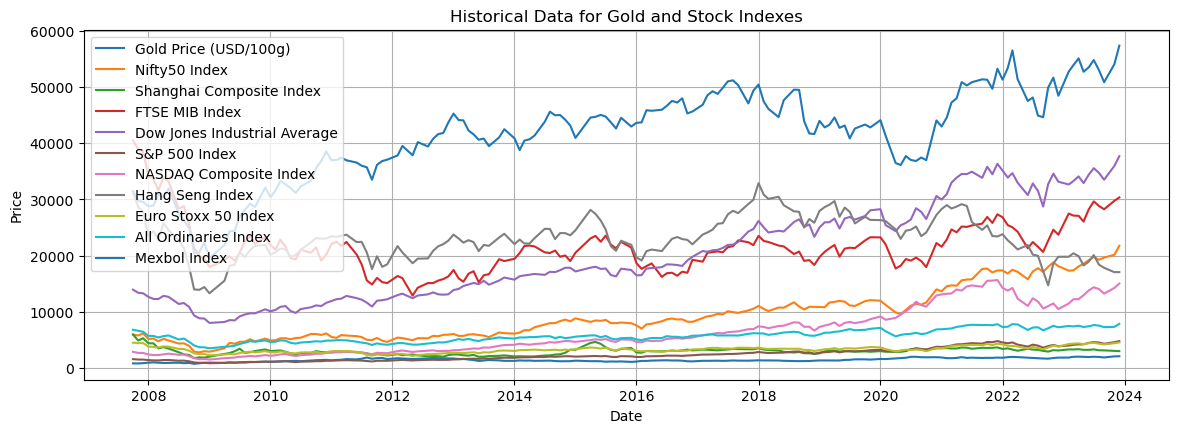

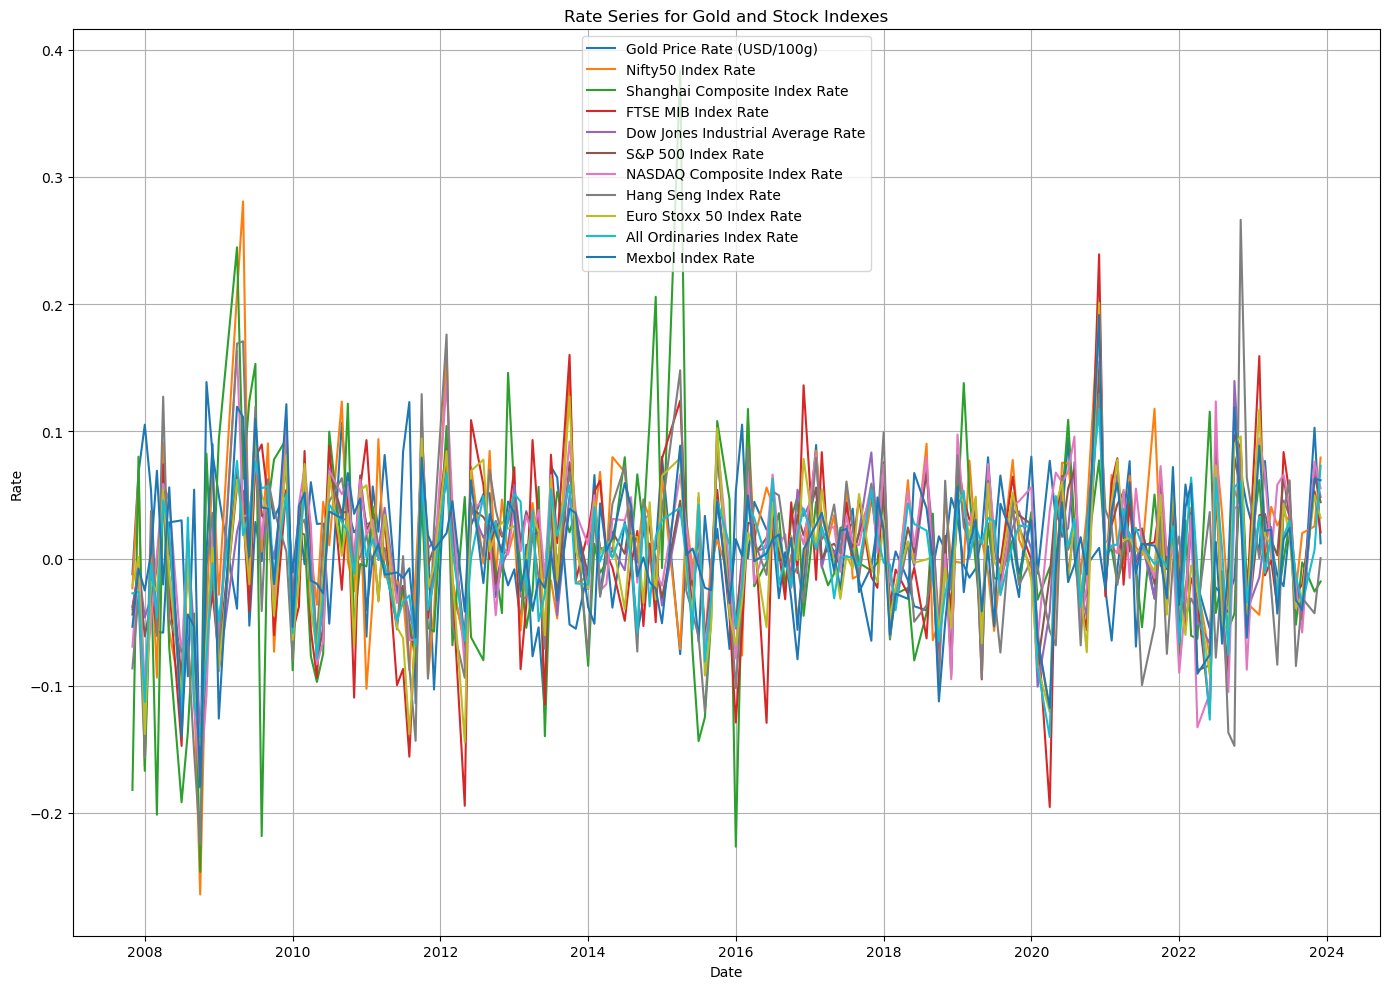

Epoch 1/100


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 155ms/step - loss: 0.2947
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - loss: 0.0349
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - loss: 0.0338
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0216
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.0253
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0267
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - loss: 0.0176
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - loss: 0.0276
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - loss: 0.0207
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - loss: 0.0174
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0204
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0181
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 0.0172
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.0169
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - loss: 0.0167
Epoch 16/100
2/2

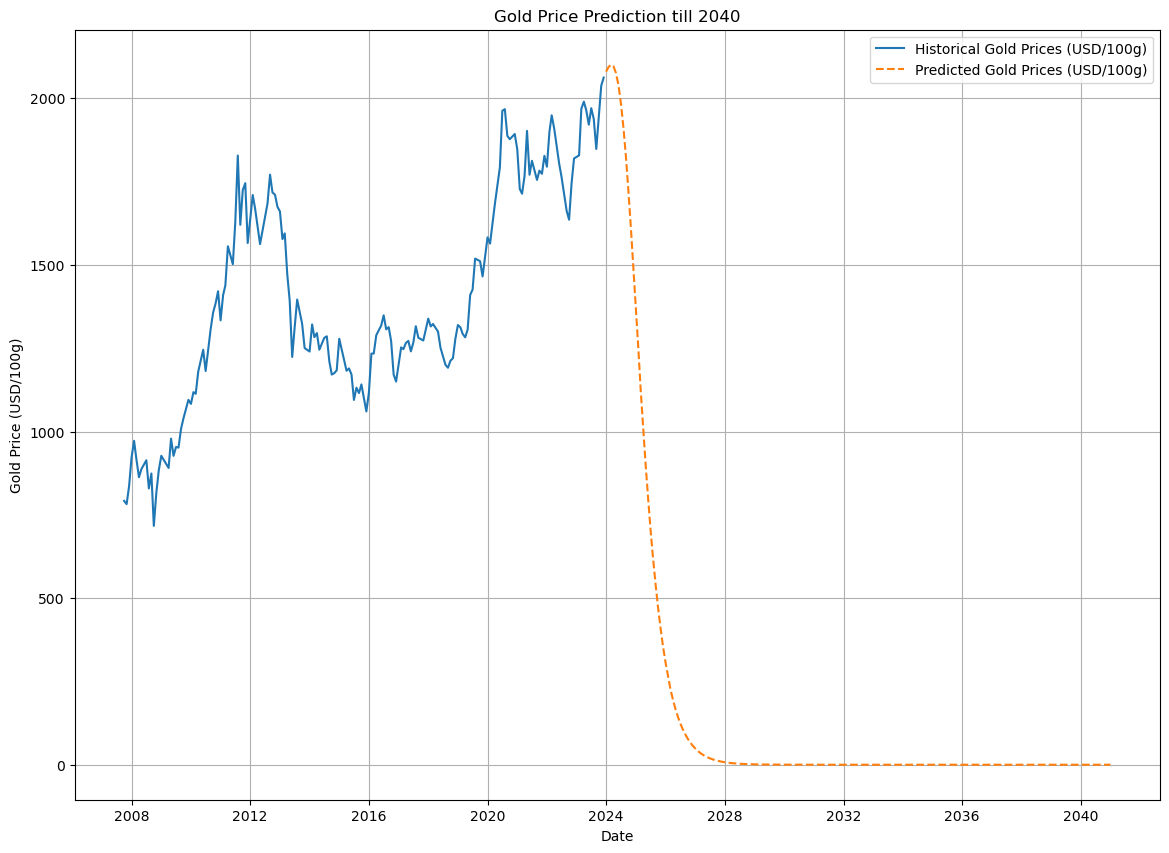

In [173]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()

# Add exchange rates to aligned_data
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Convert indices to USD
for index in indexes:
    if index in aligned_data.columns:
        # Extract currency from index ticker if possible (assuming format ^INDEX)
        currency = index.split('^')[1] if '^' in index else None
        if currency and currency in exchange_data_processed:
            aligned_data[f'{index}_USD'] = aligned_data[index] * exchange_data_processed[currency]
        else:
            aligned_data[f'{index}_USD'] = aligned_data[index]

# Drop rows with NaN values
aligned_data = aligned_data.dropna()

# Plot the aligned data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=full_name)

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

# Calculate rate series (percentage change)
rate_series = aligned_data.pct_change().dropna()

# Plot the rate series in a separate figure
plt.figure(figsize=(14, 10))
plt.plot(rate_series.index, rate_series['Close'], label='Gold Price Rate (USD/100g)')
for index in indexes:
    if f'{index}_USD' in rate_series.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(rate_series.index, rate_series[f'{index}_USD'], label=f'{full_name} Rate')

plt.title('Rate Series for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Proceed with the rest of the code...
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if rate_series.empty or len(rate_series) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(rate_series)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Close' price rate of gold
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Close' price rate of gold 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Close' price rate of gold

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_rates = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next rate
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted rate

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_data.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates  # Fill only the 'Close' column with predictions
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Reconstruct the absolute gold prices
# Start with the latest known value
initial_value = gold_data['Close'].iloc[-1]
absolute_prices = [initial_value]

for rate in predicted_rates:
    new_value = absolute_prices[-1] * (1 + rate)
    absolute_prices.append(new_value)

# Create DataFrame to store the predictions
future_df = pd.DataFrame(absolute_prices[1:], index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the predictions
plt.figure(figsize=(14, 10))
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


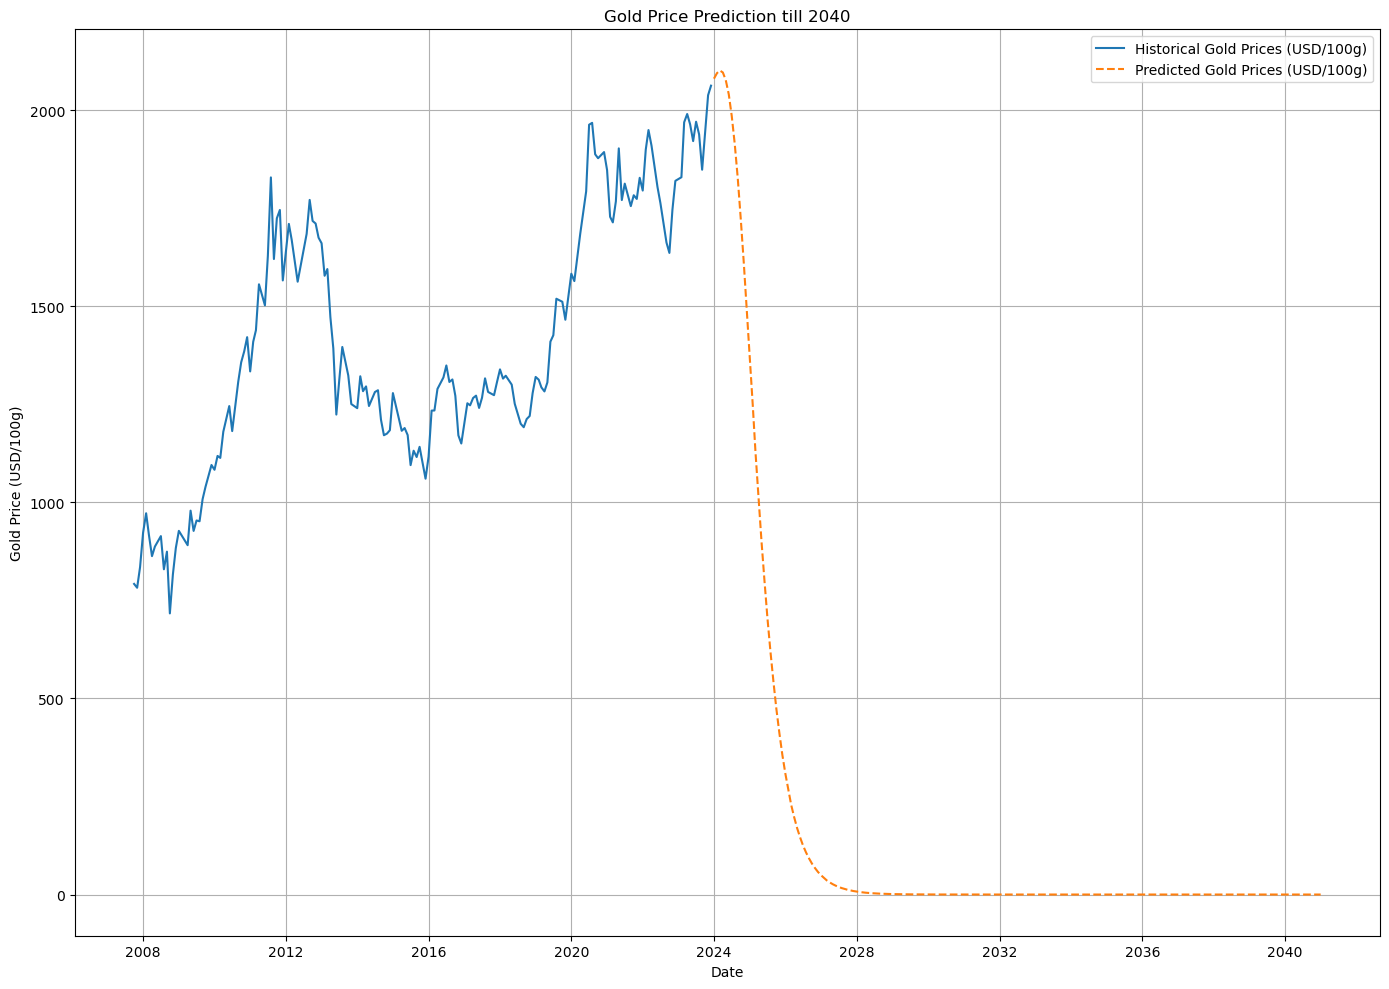

Download completed


In [175]:
# Reconstruct the absolute gold prices
# Start with the latest known value
initial_value = gold_data['Close'].iloc[-1]
absolute_prices = [initial_value]

# Apply the compounded rate to reconstruct future prices
for rate in predicted_rates:
    new_value = absolute_prices[-1] * (1 + rate)  # Compounding effect
    absolute_prices.append(new_value)

# Create DataFrame to store the predictions
future_df = pd.DataFrame(absolute_prices[1:], index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the predictions
plt.figure(figsize=(14, 10))
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


Fetching data...


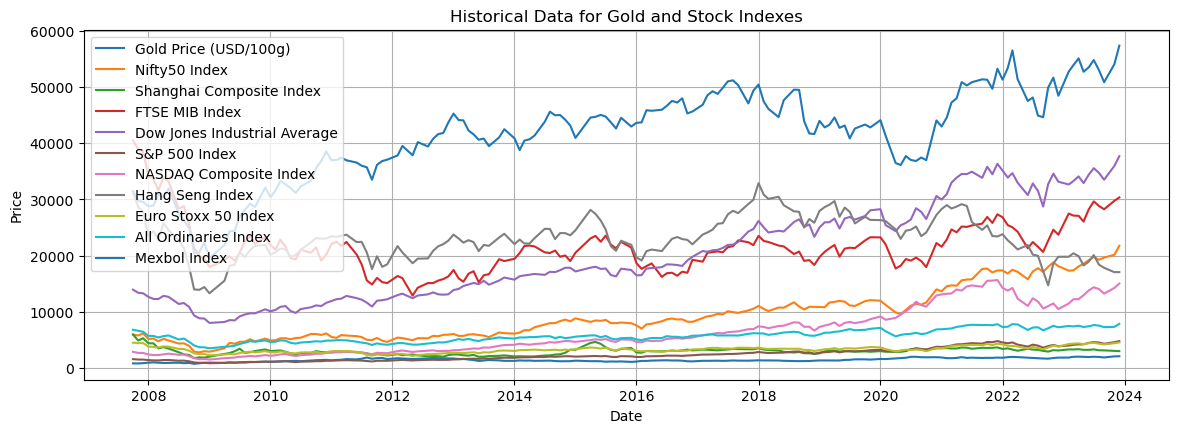

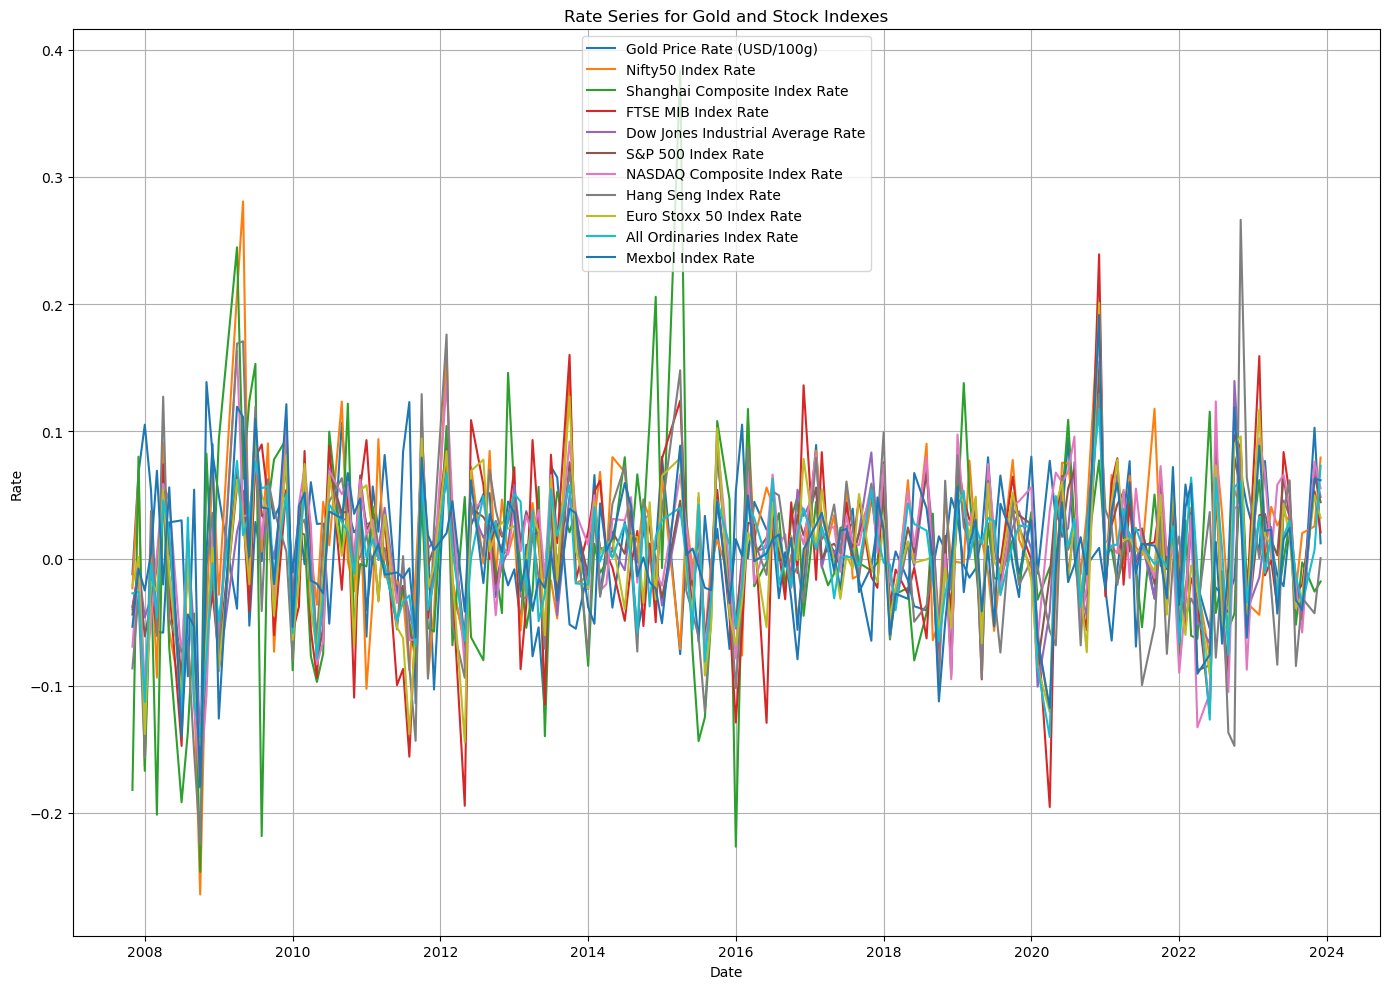

C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - loss: 0.3524
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.1859
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0447
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0240
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0267
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0225
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0298
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0177
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0242
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0258
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0184
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0170
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - loss: 0.0178
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0172
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0171
Epoch 16/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step

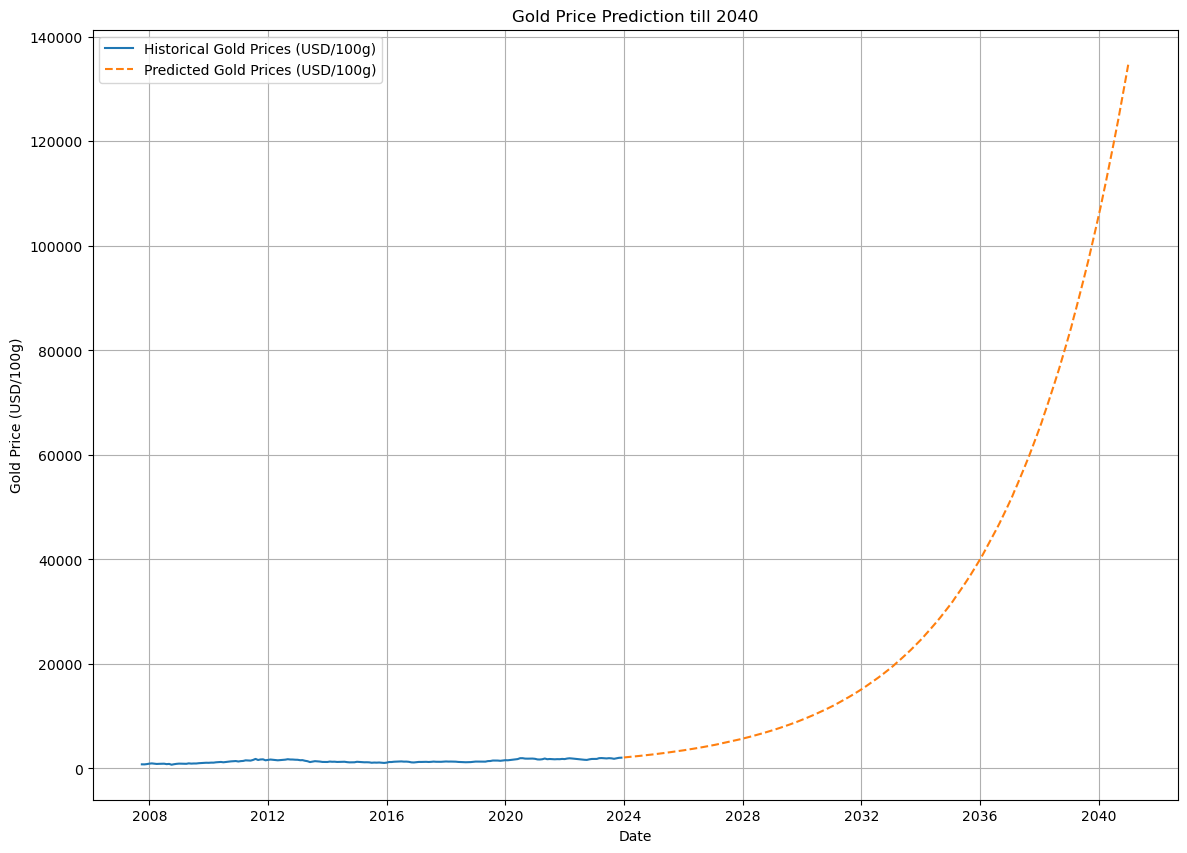

In [177]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()

# Add exchange rates to aligned_data
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Convert indices to USD
for index in indexes:
    if index in aligned_data.columns:
        # Extract currency from index ticker if possible (assuming format ^INDEX)
        currency = index.split('^')[1] if '^' in index else None
        if currency and currency in exchange_data_processed:
            aligned_data[f'{index}_USD'] = aligned_data[index] * exchange_data_processed[currency]
        else:
            aligned_data[f'{index}_USD'] = aligned_data[index]

# Drop rows with NaN values
aligned_data = aligned_data.dropna()

# Plot the aligned data
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)

# Plot gold prices
plt.plot(aligned_data.index, aligned_data['Close'], label='Gold Price (USD/100g)')

# Plot indexes
for index in indexes:
    if f'{index}_USD' in aligned_data.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(aligned_data.index, aligned_data[f'{index}_USD'], label=full_name)

plt.title('Historical Data for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best')
plt.grid(True)

# Calculate rate series (percentage change)
rate_series = aligned_data.pct_change().dropna()

# Plot the rate series in a separate figure
plt.figure(figsize=(14, 10))
plt.plot(rate_series.index, rate_series['Close'], label='Gold Price Rate (USD/100g)')
for index in indexes:
    if f'{index}_USD' in rate_series.columns:
        full_name = ticker_names.get(index, index)  # Use full name if available, otherwise use ticker
        plt.plot(rate_series.index, rate_series[f'{index}_USD'], label=f'{full_name} Rate')

plt.title('Rate Series for Gold and Stock Indexes')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Proceed with the rest of the code...
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if rate_series.empty or len(rate_series) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(rate_series)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'Close' price rate of gold
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, 0])  # Predict only 'Close' price rate of gold 

X, y = np.array(X), np.array(y)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'Close' price rate of gold

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2040-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_rates = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next rate
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted rate

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_data.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates  # Fill only the 'Close' column with predictions
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Reconstruct the absolute gold prices
# Start with the latest known value
initial_value = gold_data['Close'].iloc[-1]
absolute_prices = [initial_value]

for rate in predicted_rates:
    new_value = absolute_prices[-1] * (1 + rate)
    absolute_prices.append(new_value)

# Create DataFrame to store the predictions
future_df = pd.DataFrame(absolute_prices[1:], index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the predictions
plt.figure(figsize=(14, 10))
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Download completed")


Download completed


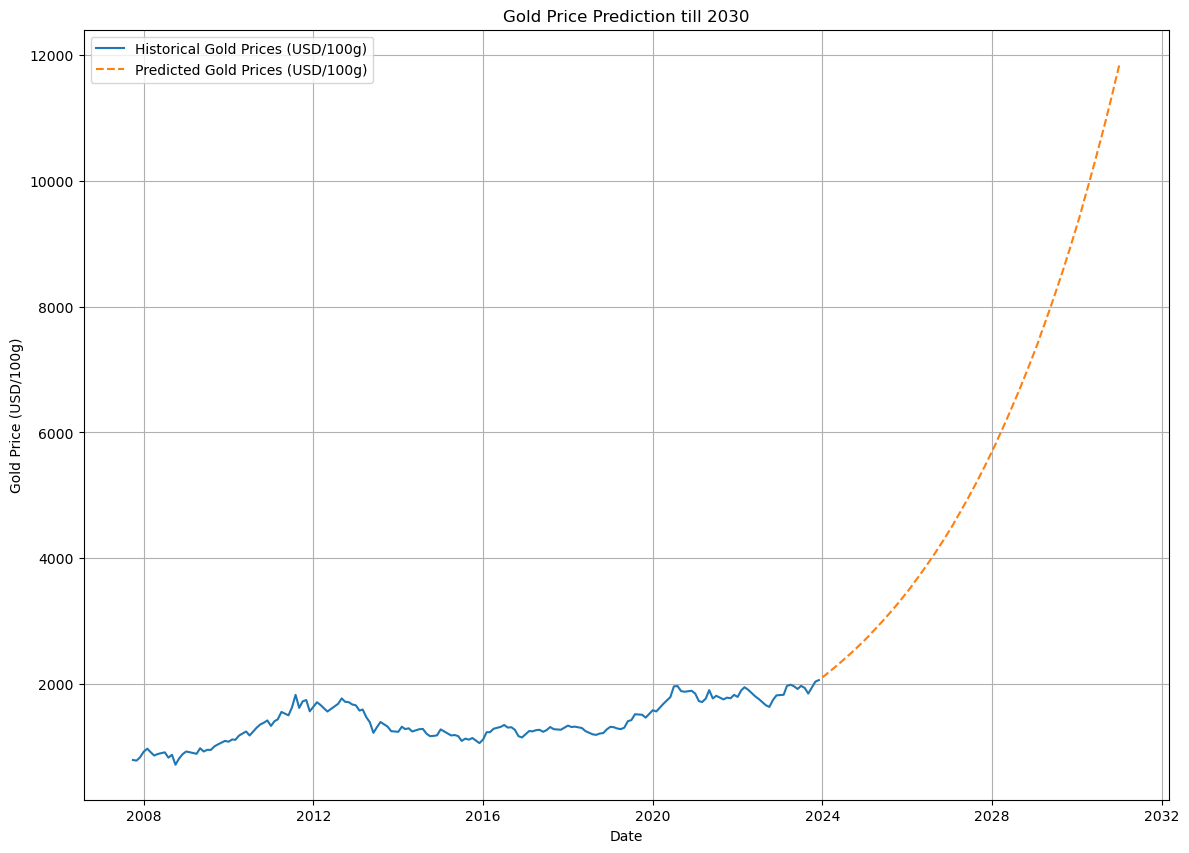

In [179]:
# Make predictions for future dates till 2040
future_dates = pd.date_range(start=aligned_data.index[-1], end='2030-12-31', freq='ME')  # Use 'ME' for monthly frequency
predicted_rates = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next rate
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, 0] = prediction[0, 0]  # Update with predicted rate

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_data.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates  # Fill only the 'Close' column with predictions
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Reconstruct the absolute gold prices
# Start with the latest known value
initial_value = gold_data['Close'].iloc[-1]
absolute_prices = [initial_value]

for rate in predicted_rates:
    new_value = absolute_prices[-1] * (1 + rate)
    absolute_prices.append(new_value)

# Create DataFrame to store the predictions
future_df = pd.DataFrame(absolute_prices[1:], index=future_dates, columns=['Gold Price (USD/100g)'])

# Plot the predictions
plt.figure(figsize=(14, 10))
plt.plot(aligned_data.index, aligned_data['Close'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price (USD/100g)'], label='Predicted Gold Prices (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction till 2030')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2030.csv')
print("Download completed")

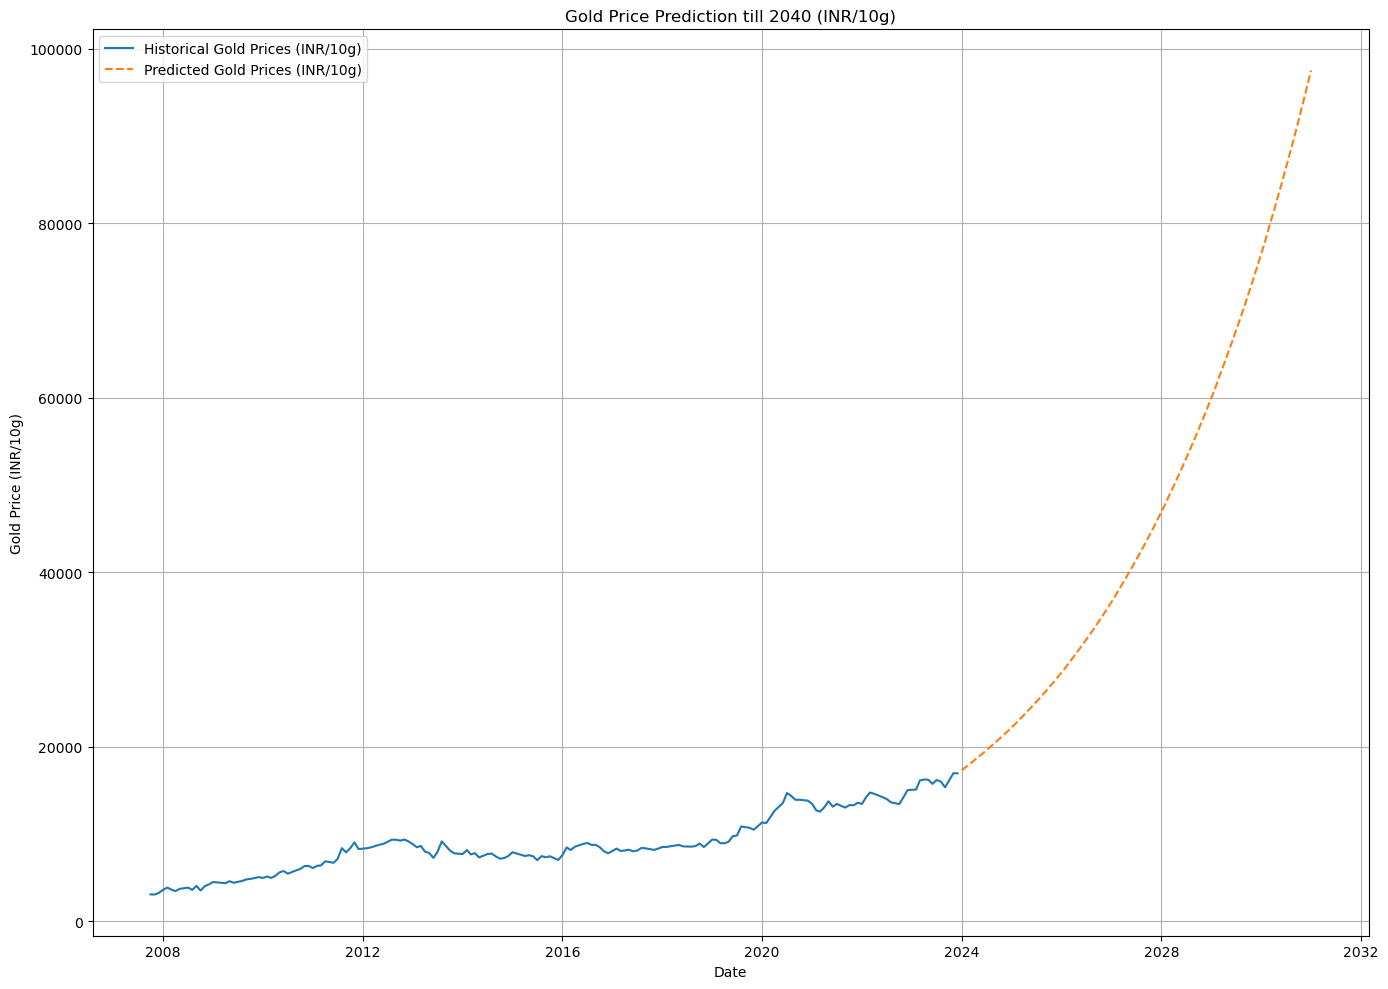

Download completed


In [181]:
# Assuming you have the INR/USD exchange rate for each future date
# Create a DataFrame for INR/USD exchange rates
exchange_rate_series = pd.Series(index=future_dates)  # Create an empty series for the rates

# Fill the exchange_rate_series with appropriate exchange rates, if available

# Initialize with the latest exchange rate
initial_exchange_rate = exchange_data['INR=X'].loc[aligned_data.index[-1], 'Close']
exchange_rate_series[future_dates] = initial_exchange_rate

# Initialize with the latest known gold price in USD per 100 grams
initial_value_usd = gold_data['Close'].iloc[-1]

# Calculate absolute prices in USD
absolute_prices_usd = [initial_value_usd]
for rate in predicted_rates:
    new_value_usd = absolute_prices_usd[-1] * (1 + rate)  # Compounding effect
    absolute_prices_usd.append(new_value_usd)

# Convert absolute prices to INR per 10 grams
# First, convert USD to INR and adjust for 10 grams
absolute_prices_inr = []
for i, price_usd in enumerate(absolute_prices_usd[1:]):
    exchange_rate = exchange_rate_series[future_dates[i]]
    price_inr = price_usd * exchange_rate
    # Convert from price per 100 grams to price per 10 grams
    price_inr_per_10gm = price_inr / 10
    absolute_prices_inr.append(price_inr_per_10gm)

# Create DataFrame for INR predictions
future_df_inr = pd.DataFrame(absolute_prices_inr, index=future_dates, columns=['Gold Price (INR/10g)'])

# Plot the predictions
plt.figure(figsize=(14, 10))
plt.plot(aligned_data.index, aligned_data['Close'] * exchange_data['INR=X'].reindex(aligned_data.index)['Close'] / 10, label='Historical Gold Prices (INR/10g)')
plt.plot(future_df_inr.index, future_df_inr['Gold Price (INR/10g)'], label='Predicted Gold Prices (INR/10g)', linestyle='--')
plt.title('Gold Price Prediction till 2040 (INR/10g)')
plt.xlabel('Date')
plt.ylabel('Gold Price (INR/10g)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the predictions
future_df_inr.to_csv('gold_price_predictions_inr_till_2040.csv')
print("Download completed")


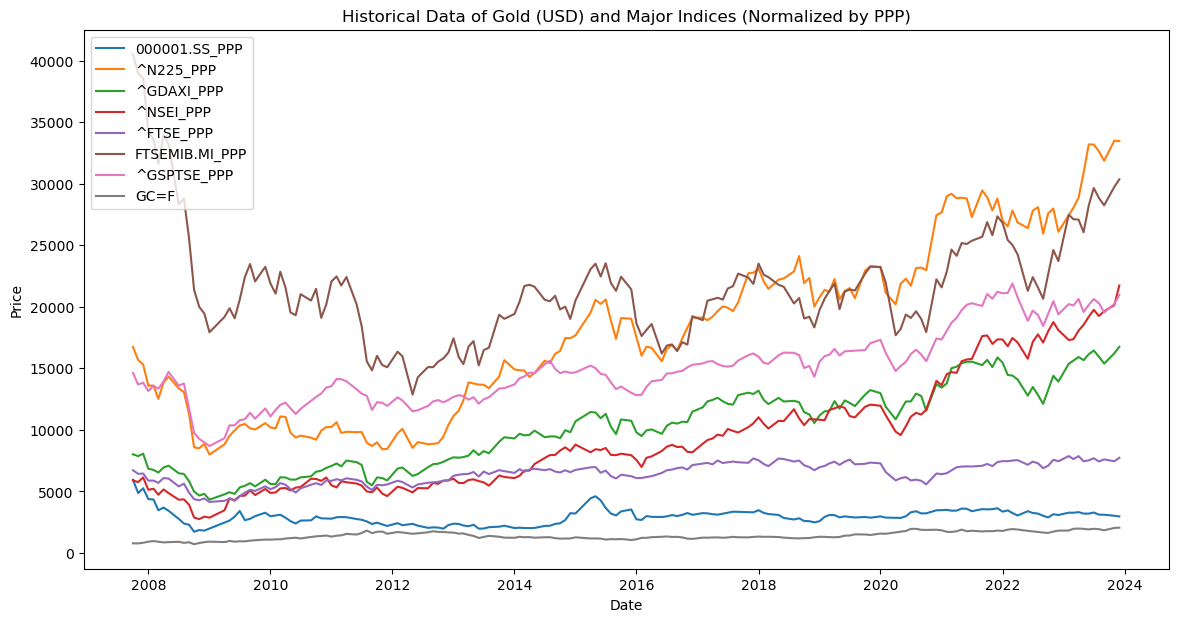

X Shape: (107, 60, 8)
y Shape: (107,)


C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - loss: 0.3756
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.2018
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0735
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0857
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0434
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0582
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0405
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0438
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0317
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0224
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0211
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0142
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0126
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0081
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.0130
Epoch 16/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step

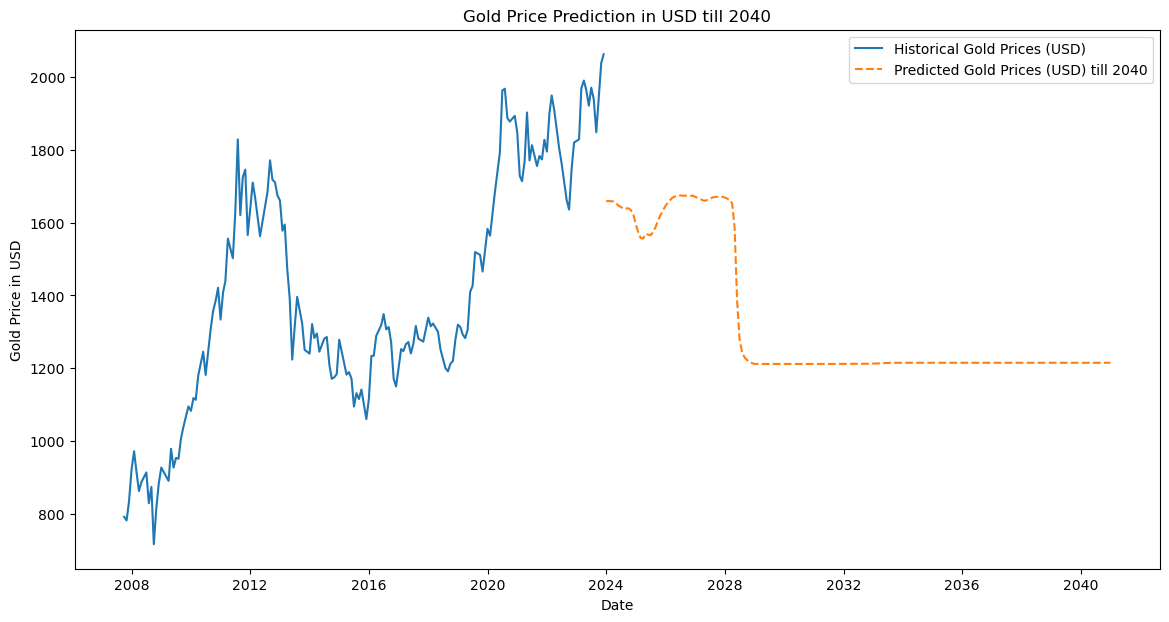

Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.


In [183]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define the start and end date
start_date = '2004-01-01'
end_date = '2024-01-01'

# List of top 10 global stock indices
tickers = [
    'GC=F',  # Gold (USD)
    '^GSPC', # S&P 500 (US)
    '000001.SS', # Shanghai Composite (China)
    '^N225', # Nikkei 225 (Japan)
    '^GDAXI',# DAX (Germany)
    '^NSEI', # NIFTY 50 (India)
    '^FTSE', # FTSE 100 (UK)
    'FTSEMIB.MI',# FTSE MIB (Italy)
    '^GSPTSE' # TSX Composite (Canada)
]

# Download data for the indices
close_prices = yf.download(tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']

# Download foreign exchange rates against USD for necessary currencies
fx_tickers = ['CNYUSD=X', 'JPYUSD=X', 'EURUSD=X', 'INRUSD=X', 'GBPUSD=X', 'CADUSD=X']
fx_data = yf.download(fx_tickers, start=start_date, end=end_date, interval='1mo', progress=False)['Close']
fx_data.columns = ['CNY/USD', 'JPY/USD', 'EUR/USD', 'INR/USD', 'GBP/USD', 'CAD/USD']

# PPP data (assuming you have PPP index data or proxy; replace with actual PPP data source)
# Example PPP index for demonstration, replace with actual data
ppp_data = pd.DataFrame({
    'CNY/PPP': 3.64,  # Placeholder value
    'JPY/PPP': 94.68,  # Placeholder value
    'EUR/PPP': 0.70,  # Placeholder value
    'INR/PPP': 20.22,  # Placeholder value
    'GBP/PPP': 0.67,  # Placeholder value
    'CAD/PPP': 1.17   # Placeholder value
}, index=fx_data.index)

# Normalize the indices using PPP
aligned_data = close_prices.join(fx_data).dropna()
for ticker in ['000001.SS', '^N225', '^GDAXI', '^NSEI', '^FTSE', 'FTSEMIB.MI', '^GSPTSE']:
    currency = ticker.split('_')[0] if ticker.split('_')[0] in fx_data.columns else None
    if currency and currency in ppp_data.columns:
        aligned_data[ticker + '_PPP'] = aligned_data[ticker] / ppp_data[currency + '/PPP']
    else:
        aligned_data[ticker + '_PPP'] = aligned_data[ticker]  # No PPP normalization needed

# Add Gold prices to the dataset
aligned_data['GC=F'] = close_prices['GC=F']

# Select relevant columns
ppp_normalized_data = aligned_data[[col for col in aligned_data.columns if '_PPP' in col] + ['GC=F']]

# Drop any remaining NaN values
ppp_normalized_data = ppp_normalized_data.dropna()

# Plot the data
plt.figure(figsize=(14, 7))
for column in ppp_normalized_data.columns:
    plt.plot(ppp_normalized_data.index, ppp_normalized_data[column], label=column)
plt.title('Historical Data of Gold (USD) and Major Indices (Normalized by PPP)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Define look_back period
look_back = 60  # Number of previous periods (months) to consider for prediction

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

# Check if there is data to scale
if ppp_normalized_data.empty or len(ppp_normalized_data) <= look_back:
    raise ValueError("Insufficient data for scaling. Ensure data is correctly processed.")

scaled_data = scaler.fit_transform(ppp_normalized_data)

# Prepare the data for LSTM
X, y = [], []

# We will predict only the 'GC=F' price (Gold in USD)
for i in range(look_back, len(scaled_data)):
    X.append(scaled_data[i-look_back:i, :])  # Use all features
    y.append(scaled_data[i, -1])  # Predict only 'GC=F' price

X, y = np.array(X), np.array(y)

# Check shapes of X and y
print("X Shape:", X.shape)
print("y Shape:", y.shape)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dense(units=1))  # Output only 'GC=F' (Gold/USD)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Train the model
model.fit(X, y, epochs=100, batch_size=100, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=ppp_normalized_data.index[-1], end='2040-12-31', freq='ME')
predicted_prices = []

last_data = scaled_data[-look_back:]  # Last look_back months of data

for _ in range(len(future_dates)):
    # Predict the next value
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_prices.append(prediction[0, 0])  # Extract single value

    # Update the data with the new prediction
    last_data = np.vstack([last_data[1:], np.zeros((1, last_data.shape[1]))])  # Shift data forward
    last_data[-1, -1] = prediction[0, 0]  # Update with predicted 'GC=F'

# Transform the predictions back to the original scale
predicted_prices_scaled = np.zeros((len(predicted_prices), scaled_data.shape[1]))
predicted_prices_scaled[:, -1] = predicted_prices  # Fill only the 'GC=F' column with predictions
predicted_prices = scaler.inverse_transform(predicted_prices_scaled)[:, -1]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_prices, index=future_dates, columns=['GC=F'])

# Plot the predictions for 'GC=F'
plt.figure(figsize=(14, 7))
plt.plot(ppp_normalized_data.index, ppp_normalized_data['GC=F'], label='Historical Gold Prices (USD)')
plt.plot(future_df.index, future_df['GC=F'], label='Predicted Gold Prices (USD) till 2040', linestyle='--')
plt.title('Gold Price Prediction in USD till 2040')
plt.xlabel('Date')
plt.ylabel('Gold Price in USD')
plt.legend()
plt.show()

# Save the predictions
future_df.to_csv('gold_price_predictions_till_2040.csv')
print("Prediction completed and saved as 'gold_price_predictions_till_2040.csv'.")


Fetching data...


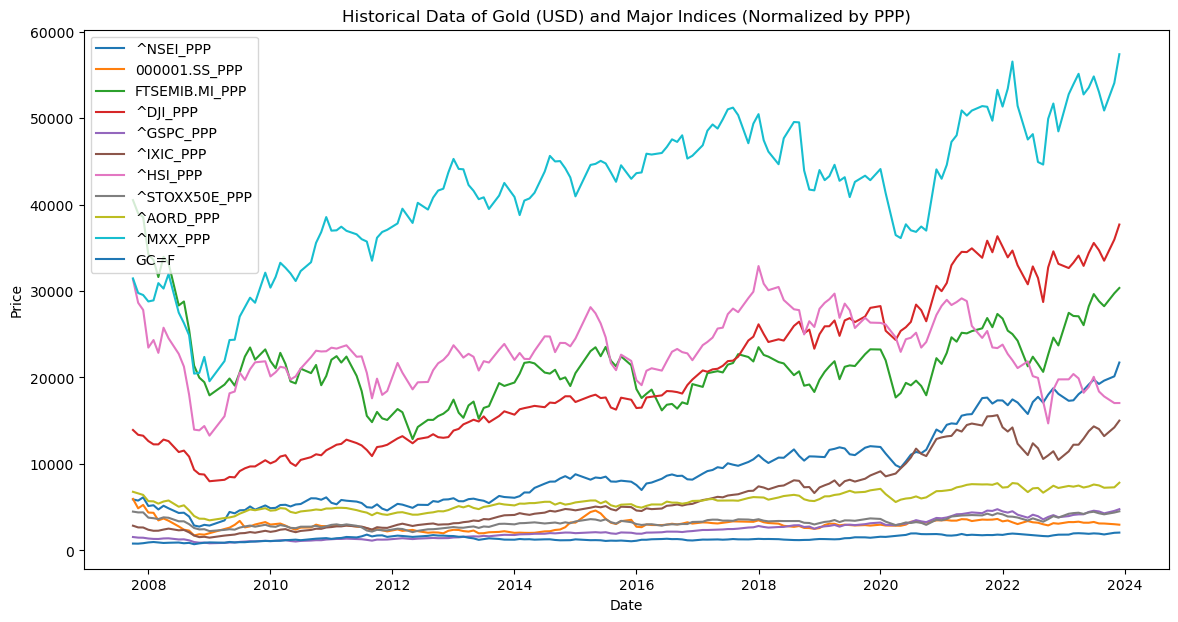

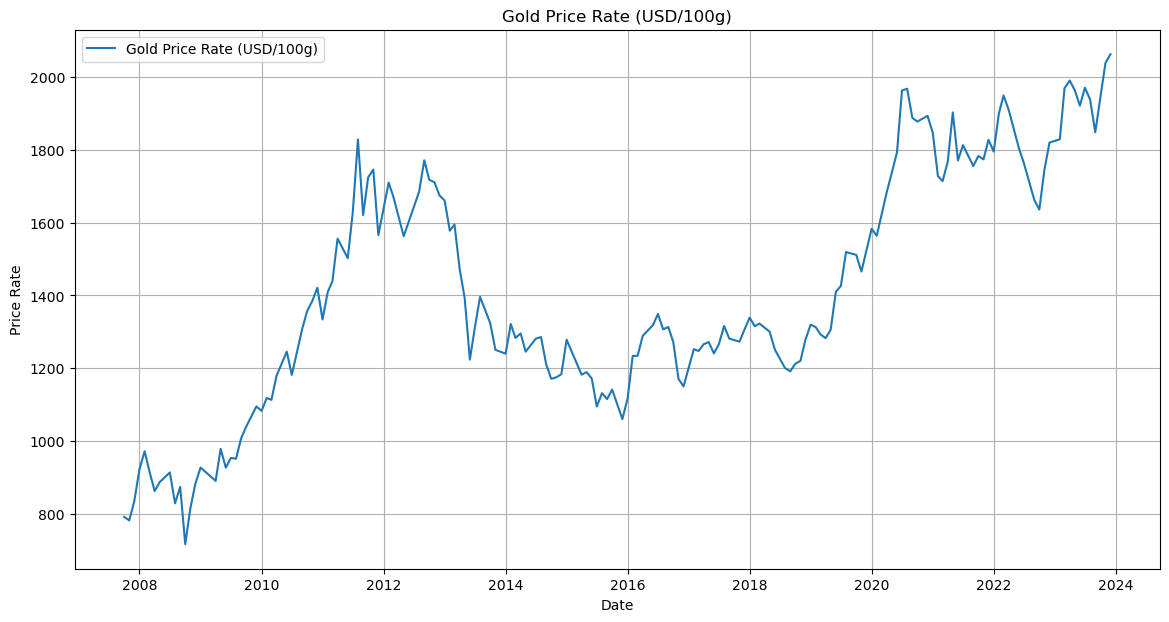

C:\Users\Snapper\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 772ms/step - loss: 0.3630
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - loss: 0.1898
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 762ms/step - loss: 0.8597
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 752ms/step - loss: 0.0975
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 755ms/step - loss: 0.1857
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 764ms/step - loss: 0.1842
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 753ms/step - loss: 0.1480
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 759ms/step - loss: 0.0952
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 748ms/step - loss: 0.0544
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 747ms/step - loss: 0.0689
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 736ms/step - loss: 0.0732
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 760ms/step - loss: 0.0499
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 771ms/step - loss: 0.0483
Epoch 14/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 764ms/step - loss: 0.0538
Epoch 15/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 758ms/step - loss: 0.0563
Epoch 16/30
2/2 ━━

C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\2256298476.py:165: RuntimeWarning: overflow encountered in scalar multiply
  reconstructed_gold_prices_usd.append(reconstructed_gold_prices_usd[-1] * rate)
C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\2256298476.py:169: RuntimeWarning: overflow encountered in scalar multiply
  gold_price_inr_per_10gm = [price * conversion_rate_inr_per_usd * 10 for price in reconstructed_gold_prices_usd]


ValueError: Shape of passed values is (206, 1), indices imply (205, 1)

In [185]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

# For reproducibility
np.random.seed(42)

# Define tickers
gold_ticker = 'GC=F'  # Gold in USD per ounce
currencies = ['INR=X', 'EUR=X', 'JPY=X', 'GBP=X', 'AUD=X', 'CAD=X', 'CHF=X', 'CNY=X', 'NZD=X', 'SEK=X']
indexes = ['^NSEI', '000001.SS', 'FTSEMIB.MI', '^DJI', '^GSPC', '^IXIC', '^HSI', '^STOXX50E', '^AORD', '^MXX']

# Fetch data
print("Fetching data...")

# Gold price data
gold_data = yf.download(gold_ticker, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
gold_data = gold_data[['Close']]

# Exchange rates
exchange_data = {currency: yf.download(currency, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
                 for currency in currencies}
exchange_data = {currency: data[['Close']] for currency, data in exchange_data.items()}

# Stock indexes
index_data = {index: yf.download(index, start='2004-01-01', end='2024-01-01', interval='1mo', progress=False)
              for index in indexes}
index_data = {index: data[['Close']] for index, data in index_data.items()}

# Process exchange rates
exchange_data_processed = {}
for currency in currencies:
    if currency in exchange_data:
        exchange_data_processed[currency] = exchange_data[currency]['Close']

# Align data
aligned_data = gold_data.copy()
for currency, data in exchange_data_processed.items():
    aligned_data[currency] = data

# Fetch and process stock market index data
index_data_processed = {}
for index in indexes:
    if index in index_data:
        index_data_processed[index] = index_data[index]['Close']

# Add index data to aligned_data
for index, data in index_data_processed.items():
    aligned_data[index] = data

# Define PPP data
ppp_data = pd.DataFrame({
    'CNY/PPP': [3.64],  # Placeholder value
    'JPY/PPP': [94.68],  # Placeholder value
    'EUR/PPP': [0.70],  # Placeholder value
    'INR/PPP': [20.22],  # Placeholder value
    'GBP/PPP': [0.67],  # Placeholder value
    'CAD/PPP': [1.17]   # Placeholder value
}, index=aligned_data.index)

# Normalize the indices using PPP
for ticker in indexes:
    if ticker in aligned_data.columns:
        currency = ticker.split('^')[-1] if '^' in ticker else None
        if currency and f'{currency}/PPP' in ppp_data.columns:
            aligned_data[f'{ticker}_PPP'] = aligned_data[ticker] / ppp_data[f'{currency}/PPP'][0]
        else:
            aligned_data[f'{ticker}_PPP'] = aligned_data[ticker]  # No PPP normalization needed

# Add Gold prices to the dataset
aligned_data['GC=F'] = gold_data['Close']

# Select relevant columns
ppp_normalized_data = aligned_data[[col for col in aligned_data.columns if '_PPP' in col] + ['GC=F']]

# Drop any remaining NaN values
ppp_normalized_data = ppp_normalized_data.dropna()

# Plot normalized data
plt.figure(figsize=(14, 7))
for column in ppp_normalized_data.columns:
    plt.plot(ppp_normalized_data.index, ppp_normalized_data[column], label=column)
plt.title('Historical Data of Gold (USD) and Major Indices (Normalized by PPP)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

# Plot the rate series
plt.figure(figsize=(14, 7))
plt.plot(ppp_normalized_data.index, ppp_normalized_data['GC=F'], label='Gold Price Rate (USD/100g)')
plt.title('Gold Price Rate (USD/100g)')
plt.xlabel('Date')
plt.ylabel('Price Rate')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Prepare the data for LSTM
look_back = 60
scaler = MinMaxScaler(feature_range=(0, 1))

# Scale the rate series
rate_series = ppp_normalized_data[['GC=F']].values
scaled_rate_series = scaler.fit_transform(rate_series)

# Prepare data for LSTM
X, y = [], []
for i in range(look_back, len(scaled_rate_series)):
    X.append(scaled_rate_series[i-look_back:i, :])
    y.append(scaled_rate_series[i, 0])
X, y = np.array(X), np.array(y)

# Build and train LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())
model.fit(X, y, epochs=30, batch_size=64, verbose=1)

# Make predictions for future dates till 2040
future_dates = pd.date_range(start=ppp_normalized_data.index[-1], end='2040-12-31', freq='ME')
predicted_rates = []

last_data = scaled_rate_series[-look_back:]
for _ in range(len(future_dates)):
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])
    last_data = np.vstack([last_data[1:], prediction.reshape(1, -1)])

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_rate_series.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Create DataFrame to store the predictions
future_df = pd.DataFrame(predicted_rates, index=future_dates, columns=['Gold Price Rate (USD/100g)'])

# Reconstruct absolute gold prices
last_gold_price_usd = gold_data['Close'].iloc[-1]
reconstructed_gold_prices_usd = [last_gold_price_usd]
for rate in predicted_rates:
    reconstructed_gold_prices_usd.append(reconstructed_gold_prices_usd[-1] * rate)

# Convert to INR/10g
conversion_rate_inr_per_usd = exchange_data['INR=X']['Close'].iloc[-1]
gold_price_inr_per_10gm = [price * conversion_rate_inr_per_usd * 10 for price in reconstructed_gold_prices_usd]

# Create DataFrame for INR/10g gold prices
future_gold_df_inr = pd.DataFrame(gold_price_inr_per_10gm, index=future_dates, columns=['Gold Price (INR/10g)'])

# Plot results
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(ppp_normalized_data.index, ppp_normalized_data['GC=F'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price Rate (USD/100g)'], label='Predicted Gold Prices Rate (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction (USD/100g)')
plt.xlabel('Date')
plt.ylabel('Gold Price Rate (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(future_gold_df_inr.index, future_gold_df_inr['Gold Price (INR/10g)'], label='Predicted Gold Prices (INR/10g)', linestyle='--')
plt.title('Predicted Gold Prices (INR/10g)')
plt.xlabel('Date')
plt.ylabel('Gold Price (INR/10g)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save predictions
future_df.to_csv('gold_price_predictions_rate_till_2040.csv')
future_gold_df_inr.to_csv('gold_price_predictions_inr_till_2040.csv')
print("Download completed")


C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3284915358.py:26: RuntimeWarning: overflow encountered in scalar multiply
  reconstructed_gold_prices_usd.append(reconstructed_gold_prices_usd[-1] * rate)
C:\Users\Snapper\AppData\Local\Temp\ipykernel_3976\3284915358.py:30: RuntimeWarning: overflow encountered in scalar multiply
  gold_price_inr_per_10gm = [price * conversion_rate_inr_per_usd * 10 for price in reconstructed_gold_prices_usd]


Length mismatch: 206 gold prices, 205 future dates


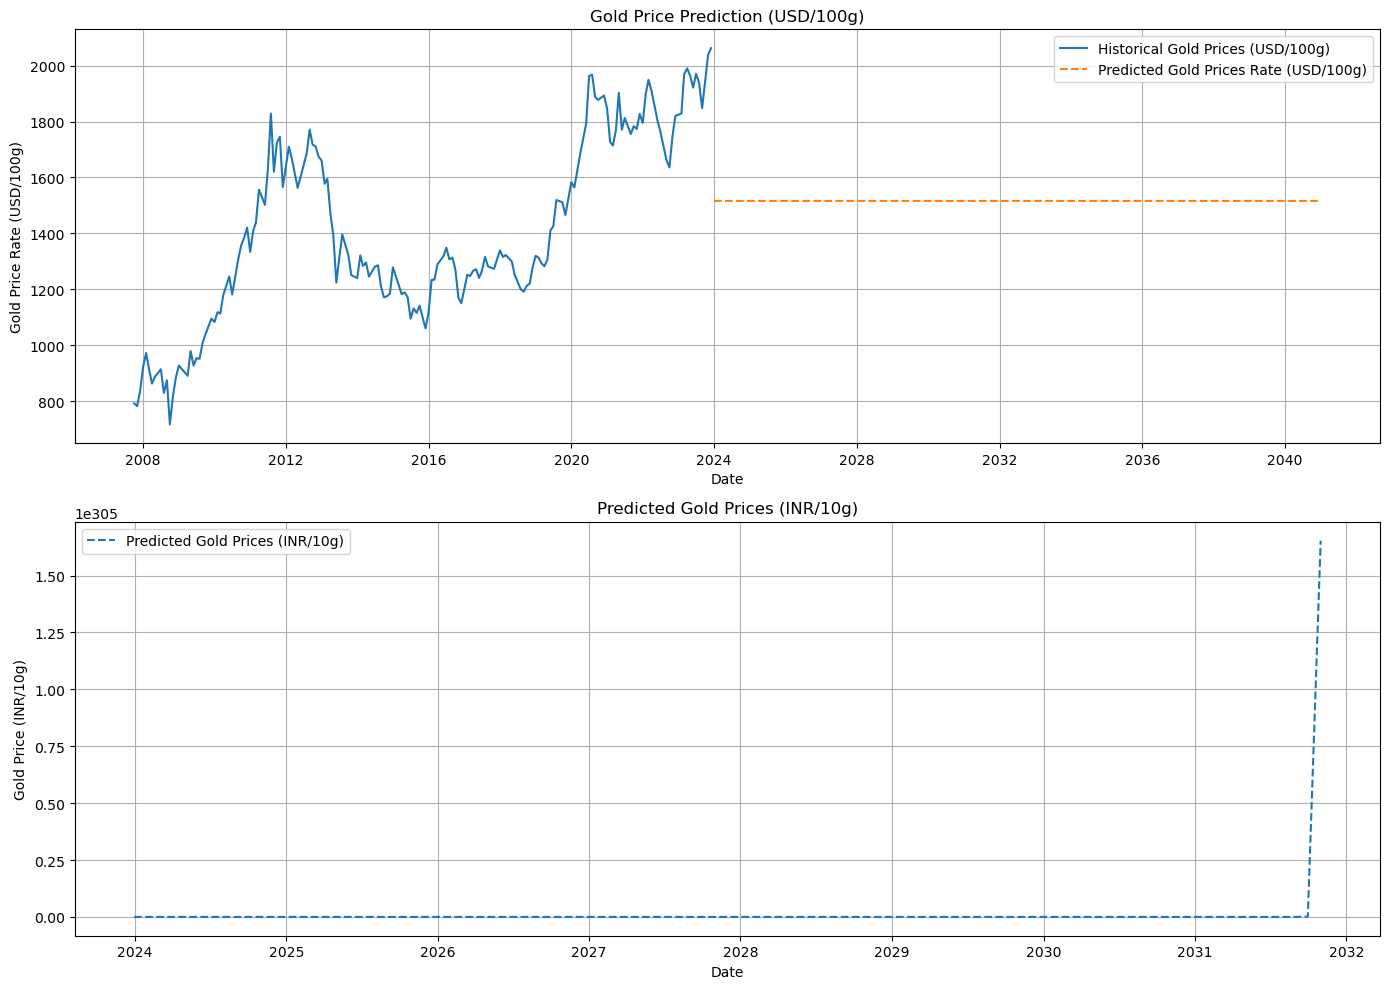

Download completed


In [187]:
# Make predictions for future dates till 2040
future_dates = pd.date_range(start=ppp_normalized_data.index[-1], end='2040-12-31', freq='ME')
predicted_rates = []

last_data = scaled_rate_series[-look_back:]
for _ in range(len(future_dates)):
    prediction = model.predict(last_data.reshape(1, look_back, X.shape[2]), verbose=0)
    predicted_rates.append(prediction[0, 0])
    last_data = np.vstack([last_data[1:], prediction.reshape(1, -1)])

# Ensure predicted_rates matches the length of future_dates
if len(predicted_rates) != len(future_dates):
    print(f"Length mismatch: {len(predicted_rates)} predictions, {len(future_dates)} future dates")
    # Adjust predicted_rates to match future_dates
    predicted_rates = predicted_rates[:len(future_dates)]

# Transform the predictions back to the original scale
predicted_rates_scaled = np.zeros((len(predicted_rates), scaled_rate_series.shape[1]))
predicted_rates_scaled[:, 0] = predicted_rates
predicted_rates = scaler.inverse_transform(predicted_rates_scaled)[:, 0]

# Reconstruct absolute gold prices
last_gold_price_usd = gold_data['Close'].iloc[-1]
reconstructed_gold_prices_usd = [last_gold_price_usd]
for rate in predicted_rates:
    reconstructed_gold_prices_usd.append(reconstructed_gold_prices_usd[-1] * rate)

# Convert to INR/10g
conversion_rate_inr_per_usd = exchange_data['INR=X']['Close'].iloc[-1]
gold_price_inr_per_10gm = [price * conversion_rate_inr_per_usd * 10 for price in reconstructed_gold_prices_usd]

# Ensure lengths match
if len(gold_price_inr_per_10gm) != len(future_dates):
    print(f"Length mismatch: {len(gold_price_inr_per_10gm)} gold prices, {len(future_dates)} future dates")
    # Adjust gold_price_inr_per_10gm to match future_dates
    gold_price_inr_per_10gm = gold_price_inr_per_10gm[:len(future_dates)]

# Create DataFrame for INR/10g gold prices
future_gold_df_inr = pd.DataFrame(gold_price_inr_per_10gm, index=future_dates, columns=['Gold Price (INR/10g)'])

# Plot results
plt.figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
plt.plot(ppp_normalized_data.index, ppp_normalized_data['GC=F'], label='Historical Gold Prices (USD/100g)')
plt.plot(future_df.index, future_df['Gold Price Rate (USD/100g)'], label='Predicted Gold Prices Rate (USD/100g)', linestyle='--')
plt.title('Gold Price Prediction (USD/100g)')
plt.xlabel('Date')
plt.ylabel('Gold Price Rate (USD/100g)')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(future_gold_df_inr.index, future_gold_df_inr['Gold Price (INR/10g)'], label='Predicted Gold Prices (INR/10g)', linestyle='--')
plt.title('Predicted Gold Prices (INR/10g)')
plt.xlabel('Date')
plt.ylabel('Gold Price (INR/10g)')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

# Save predictions
future_df.to_csv('gold_price_predictions_rate_till_2040.csv')
future_gold_df_inr.to_csv('gold_price_predictions_inr_till_2040.csv')
print("Download completed")